# About the dataset

This dataset was parsed from the following midi files:

* [Rachmaninoff Moment Musicaux, Op. 16 No. 4](https://musescore.com/user/33306646/scores/6058350)
* [Rachmaninoff Elegie, Op. 3 No. 1](https://musescore.com/user/2660886/scores/2008481)
* [Rachmaninoff Prelude, Op. 3 No. 2](https://musescore.com/user/2660886/scores/2101171)
* [Bach 846 Prelude](https://musescore.com/user/37468058/scores/7108913)
* [Bach 847 Prelude](https://musescore.com/classicman/scores/227966)
* [Chopin Nocturne Op. 9 No. 1](https://musescore.com/user/33306646/scores/6306868)
* [Chopin Nocturne Op. 9 No. 2](https://musescore.com/user/28966982/scores/5178145)
* [Chopin Nocturne Op. 48 No. 1](https://musescore.com/user/33306646/scores/6224476)
* [Chopin Nocturne Op. 55 No. 1](https://musescore.com/user/34104354/scores/6285565)
* [Chopin Torrent Etude Op. 10 No. 4](https://musescore.com/j_y_kim/scores/5497268)
* [Chopin Revolutionary Etude Op. 10 No. 12](https://musescore.com/user/33306646/scores/5807005)
* [Chopin Wrong Note Etude Op. 25 No. 5](https://musescore.com/user/33306646/scores/5801576)
* [Chopin Ocean Etude Op. 25 No. 12](https://musescore.com/user/33306646/scores/5980955)
* [Liszt Liebestraum III, Op. 541 No. 3](https://musescore.com/user/19710/scores/65159)
* [Liszt Grandes Etudes de Paganini - La campanella - S. 141 No. 3](https://musescore.com/user/15293341/scores/4426976)
* [Liszt Études d’exécution transcendante - Wilde Jagd - S. 139 No. 8](https://musescore.com/user/2749876/scores/2603331)
* [Liszt Études d’exécution transcendante - Chasse Neige - S. 139 No. 12](https://musescore.com/user/33306646/scores/6504649)
* [Liszt Consolation No. 3](https://musescore.com/user/33306646/scores/6215465)

The Dataset can be downloaded [here](https://drive.google.com/drive/folders/1xsFBW0ophcb5iB42Vd8BUzVHFOxiuSeJ?usp=sharing)

The parser requires the following packages:

* mido
* pandas

To save you some time, here is the command to run to parse all files in one command:

```
python3.9 converter.py Rachmaninoff_16_4.mid Rachmaninoff_3_2.mid Liszt_541_3.mid Rachmaninoff_3_1.mid Liszt_139_12.mid Liszt_141_3.mid Liszt_Consolation_3.mid Liszt_139_8.mid Chopin_48_1.mid Chopin_55_1.mid Chopin_25_5.mid Chopin_25_12.mid Chopin_10_4.mid Chopin_10_12.mid Bach_847_I.mid Chopin_9_1.mid Chopin_9_2.mid Bach_846_I.mid
```

# Citation Sources

[[1] https://www.cs.cmu.edu/~music/cmsip/readings/MIDI%20tutorial%20for%20programmers.html](https://www.cs.cmu.edu/~music/cmsip/readings/MIDI%20tutorial%20for%20programmers.html)

The following code assumes you installed the following packages:

- pandas
- matplotlilb
- seaborn

# Imports

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks


# Function space

In [20]:
def get_Note_Name_From_Midi_Number(note):
    midi_to_note = {}
    notes = ['A0', 'A#0', 'B0', 'C1', 'C#1', 'D1', 'D#1', 'E1', 'F1', 'F#1', 'G1', 'G#1', 
         'A1', 'A#1', 'B1', 'C2', 'C#2', 'D2', 'D#2', 'E2', 'F2', 'F#2', 'G2', 'G#2', 
         'A2', 'A#2', 'B2', 'C3', 'C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 
         'A3', 'A#3', 'B3', 'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 
         'A4', 'A#4', 'B4', 'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5', 'G5', 'G#5', 
         'A5', 'A#5', 'B5', 'C6', 'C#6', 'D6', 'D#6', 'E6', 'F6', 'F#6', 'G6', 'G#6', 
         'A6', 'A#6', 'B6', 'C7', 'C#7', 'D7', 'D#7', 'E7', 'F7', 'F#7', 'G7', 'G#7', 
         'A7', 'A#7', 'B7', 'C8']
    for i in range(21, 109):
        midi_to_note[i] = notes[i-21]
    return midi_to_note[note]

In [21]:
def plot_note_frequency(df, title):
    df = df.groupby(['note'])['note'].count().reset_index(name='count').sort_values('count')
    plt.figure(figsize=(24,9))
    g = sns.barplot(data=df, x='note', y='count')
    g.set_title(title)
    locs, labels = xticks()
    new_ticks = []
    for x in labels:
        new_ticks.append(get_Note_Name_From_Midi_Number(int(x.get_text())))
    g.set_xticks(locs, new_ticks)
    return plt

In [22]:
def plot_velocity(df, title):
    plt.figure(figsize=(24,9))
    g = sns.scatterplot(data=df, x='time', y='velocity', hue='track')
    g.set_title(title)
    # Add title
    return plt

In [23]:
def plot_notes(df, title):
    plt.figure(figsize=(24,9))
    g = sns.scatterplot(data=df, x='time', y='note', hue='track')
    g.set_title(title)
    # Add title
    return plt

In [24]:
def calculate_duration(row, df):
    if row.velocity == 0:
        return 0
    else:
        return (df.loc[(df['note'] == row.note) & (df['velocity'] == 0) & (df['time'] > row.time)].iloc[0]['time'] - row.time)

In [25]:
def calculate_note_count(df):
    return df.groupby(['track'])['track'].count()

In [26]:
def frame_transformer(df):
    """
    This is a helper function to execute all data transformations in the beginning
    """
    df['duration'] = df.apply(lambda x: calculate_duration(x, df), axis=1)
    df = df[df['velocity'] != 0]
    return df

In [27]:
def load_dataset(filename: str):
    """
    As it would be very lengthy to import 36 files like this I decided to create a helper function
    """
    note = pd.read_csv(f"output/{filename}/{filename}_note.csv", usecols=['track', 'time', 'note', 'velocity'])
    meta = pd.read_csv(f"output/{filename}/{filename}_meta.csv")
    note = frame_transformer(note)
    return note, meta

# Loading the Dataset

The following code block assumes that all of your CSV files are stored in the directory `output`, and in a directory with their filename, as the parser does that. If that is not the case, please adjust the helper function or put all CSV files in a folder structure as such:

```
output/
├─ Bach_846_I/
│  ├─ Bach_846_I_meta.csv
│  ├─ Bach_846_I_note.csv
├─ Bach_847_I/
│  ├─ Bach_847_I_meta.csv
│  ├─ Bach_847_I_note.csv
```

The naming convention is as follows:
First letter of composer
N for Note
M for Meta
Numbers smushed

so Bach_846_I turns into

BN846, BM846

Liszt's Consolidation 3 turns into
LN3

In [28]:
BN846, BM846 = load_dataset('Bach_846_I')
BN847, BM847 = load_dataset('Bach_847_I')

RN31, RM31 = load_dataset('Rachmaninoff_3_1')
RN32, RM32 = load_dataset('Rachmaninoff_3_2')
RN164, RM164 = load_dataset('Rachmaninoff_16_4')

LN1398, LM1398 = load_dataset('Liszt_139_8')
LN13912, LM13912 = load_dataset('Liszt_139_12')
LN1413, LM1413 = load_dataset('Liszt_141_3')
LN5413, LM5413 = load_dataset('Liszt_541_3')
LN3, LM3 = load_dataset('Liszt_Consolation_3')


CN91, CM91 = load_dataset('Chopin_9_1')
CN92, CM92 = load_dataset('Chopin_9_2')
CN481, CM481 = load_dataset('Chopin_48_1')
CN551, CM551 = load_dataset('Chopin_55_1')

CN104, CM104 = load_dataset('Chopin_10_4')
CN1012, CM1012 = load_dataset('Chopin_10_12')
CN255, CM255 = load_dataset('Chopin_25_5')
CN2512, CM2512 = load_dataset('Chopin_25_12')

In [29]:
meta_list = [BM846, BM847, RM31, RM32, RM164, LM1398, LM13912, LM1413, LM5413, LM3, CM91, CM92, CM481, CM551, CM104, CM1012, CM255, CM2512]
note_list = [BN846, BN847, RN31, RN32, RN164, LN1398, LN13912, LN1413, LN5413, LN3, CN91, CN92, CN481, CN551, CN104, CN1012, CN255, CN2512]

title_set = ["Bach Prelude in C", "Bach Prelude in C Minor", "Rachmaninoff Elegie", "Rachmaninoff Prelude Op. 3 No. 2", "Rachmaninoff Moment Musicaux Op. 16 No. 4",
             "Lizst Wilde Jagd", "Liszt Chasse-Neige", "Liszt La Campanella", "Liszt Liebestraum III", "Liszt Consolation III", "Chopin Nocturne Op. 9 No.1",
             "Chopin Nocturne Op. 9 No. 2", "Chopin Nocturne Op. 48 No. 1", "Chopin Nocturne Op. 55 No. 1", "Chopin Torrent Etude Op. 10 No. 4", "Chopin Revolutionary Etude Op. 10 No. 12",
             "Chopin Wrong Note Etude Op. 25 No. 5", "Chopin Ocean Etude Op. 25 No. 12"]

note_dict = dict(zip(title_set, note_list))
meta_dict = dict(zip(title_set, meta_list))

note_df = pd.concat(note_list, keys=title_set, names=['Piece Name', 'Info'])
meta_df = pd.concat(meta_list, keys=title_set, names=['Piece Name', 'Meta'])

# Analyzing Quality

In this section I take a look at the dataset I created and use these observations to see what I can plot and what will be harder to plot.

Track 0 (blue) typically denotes left-hand (LH)

Track 1 (orange) typically denotes right-hand (RH)

### Plotting velocity over time

In the following code I am plotting velocity on the y-axis over time. I do this to see with what detail the Midi File has been created in attention to dynamics. The following values can be translated to musical notation as such [[1]](https://www.cs.cmu.edu/~music/cmsip/readings/MIDI%20tutorial%20for%20programmers.html):

_piano-pianissimo_ = 20  
_pianissimo_ = 31  
_piano_ = 42  
_mezzo-piano_ = 53  
_mezzo-forte_ = 64  
_forte_ - 80  
_fortissimo_ = 96  
_fortissimo-forte_ = 112  

The first two graphs show a very straight line, indicating that there has been no effort made towards dynamic notation. This is due to the fact that Dynamic notation was not common practice during the Baroque Era. With the exception of Chopin's Nocturne Op. 9 No. 2, it seems that every dynamc has been calculated by software according to cresc. and decresc. markings, e.g. increasing - then constant - then decreasing. 

The next observation we can make is on Rachmaninoff's Prelude Op. 3 No. 2, here we get 4 tracks. I have taken a look at the Midi File in external Software and failed to see a reason why the creator split it up into 4 tracks, however, it will be difficult to use this track for some of the later analysis.

The last exception we can see is that Chopin's Nocturne Op. 9 No. 2 has an absurd amount of precision when it comes to the dynamics. I suspect that this is not calculated, but recorded from a person playing it on a piano connected to Midi Software.

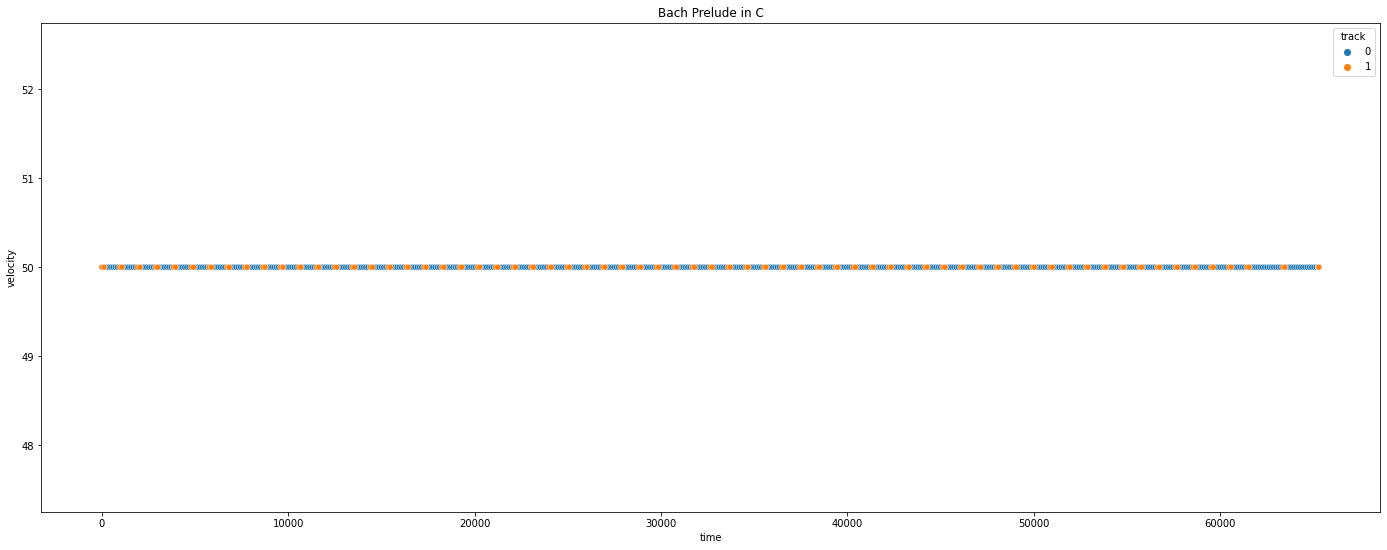

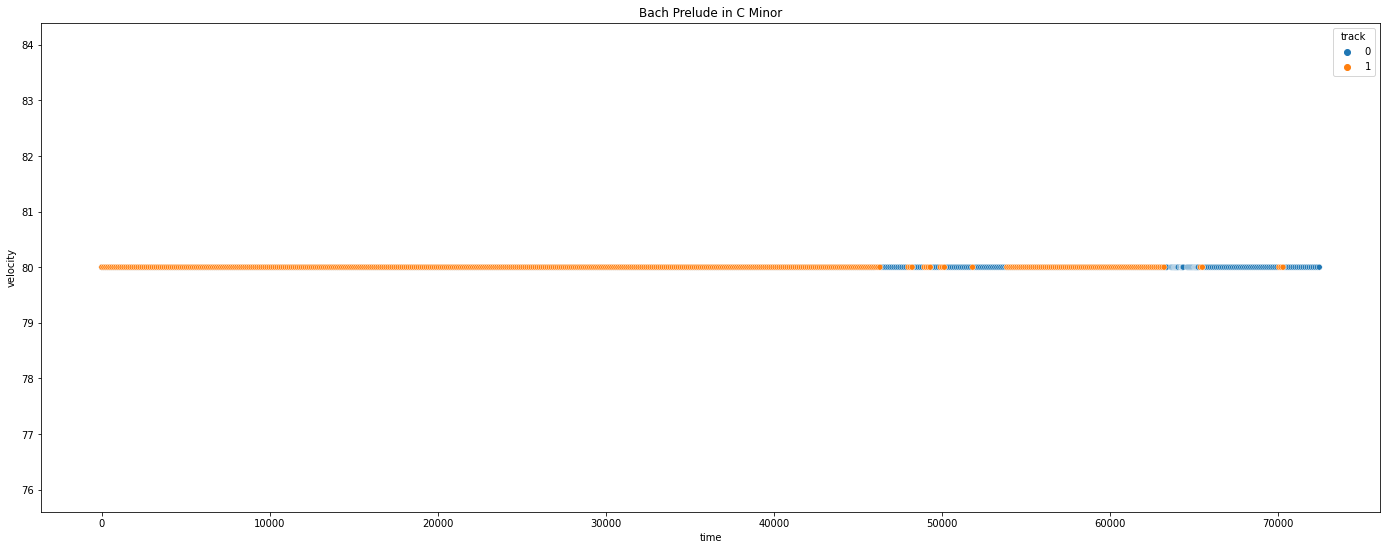

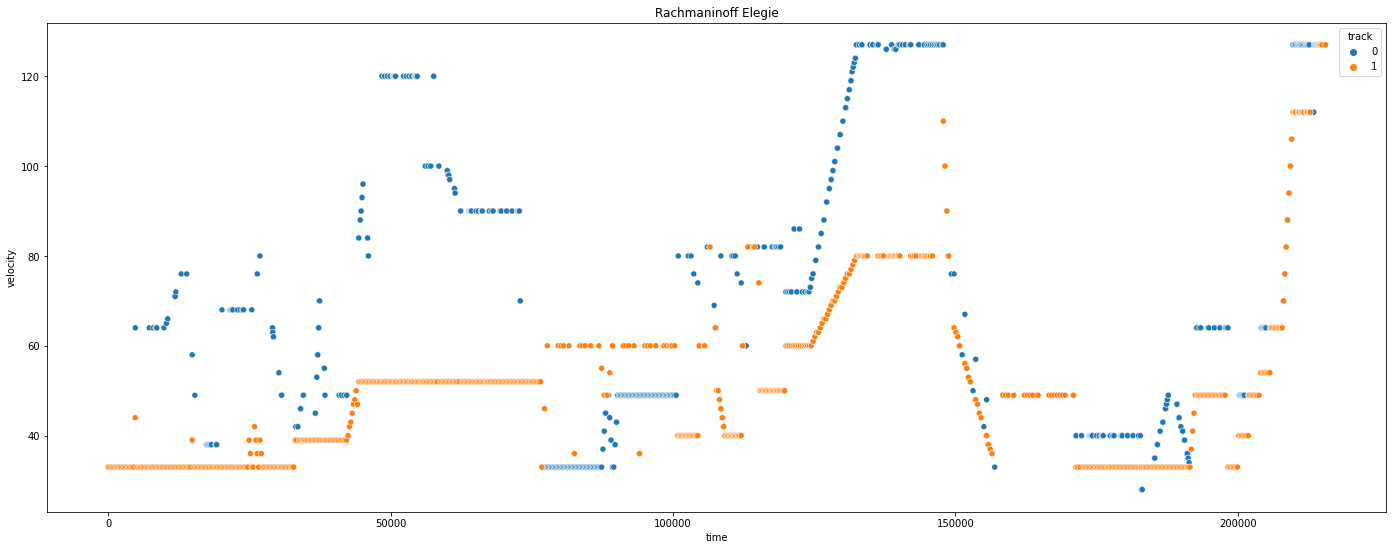

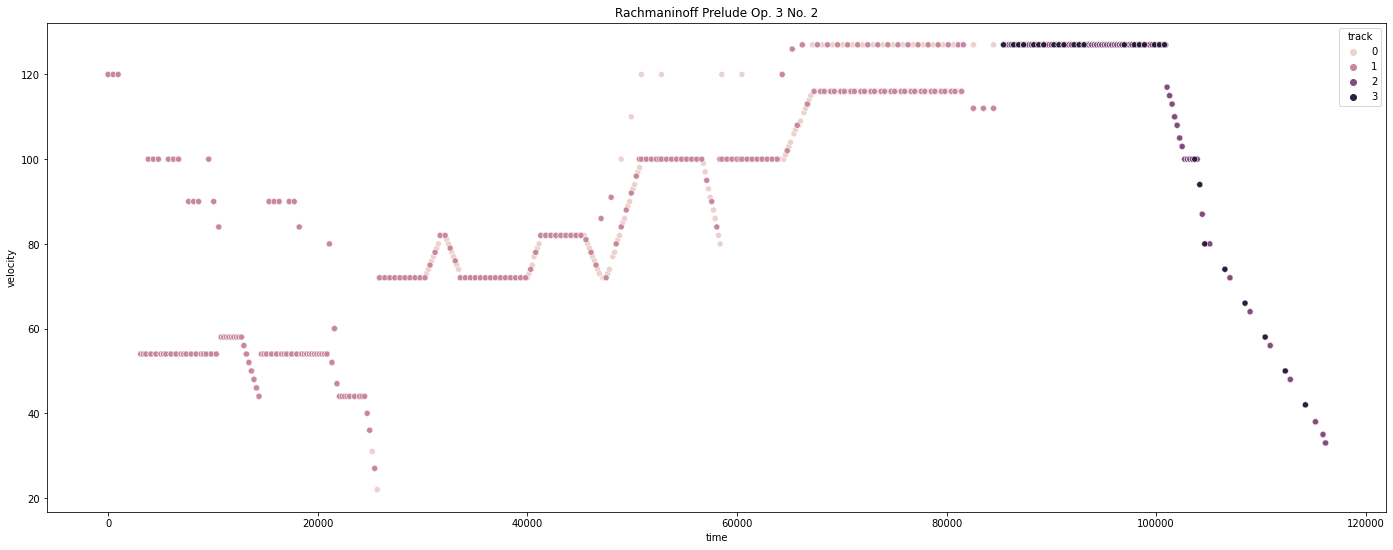

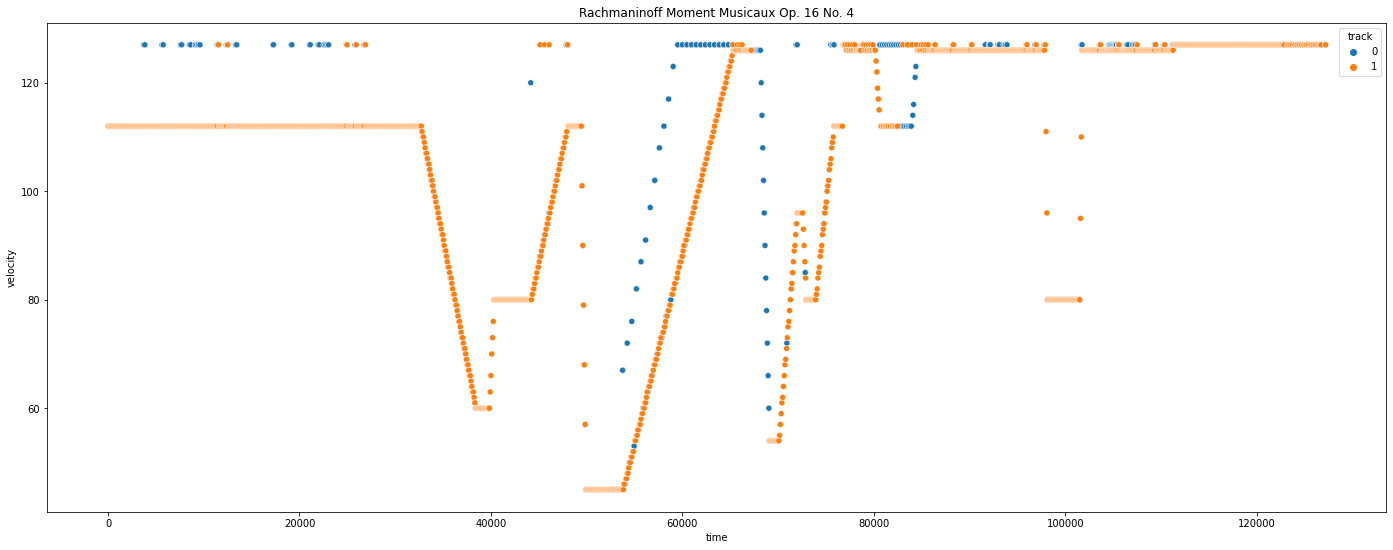

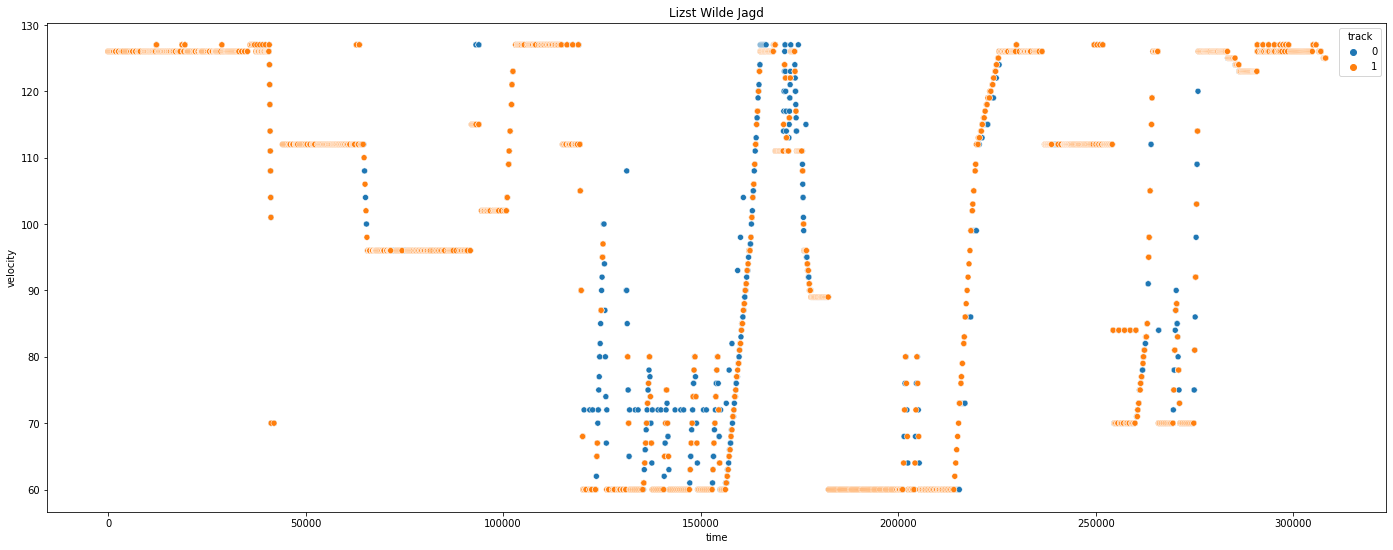

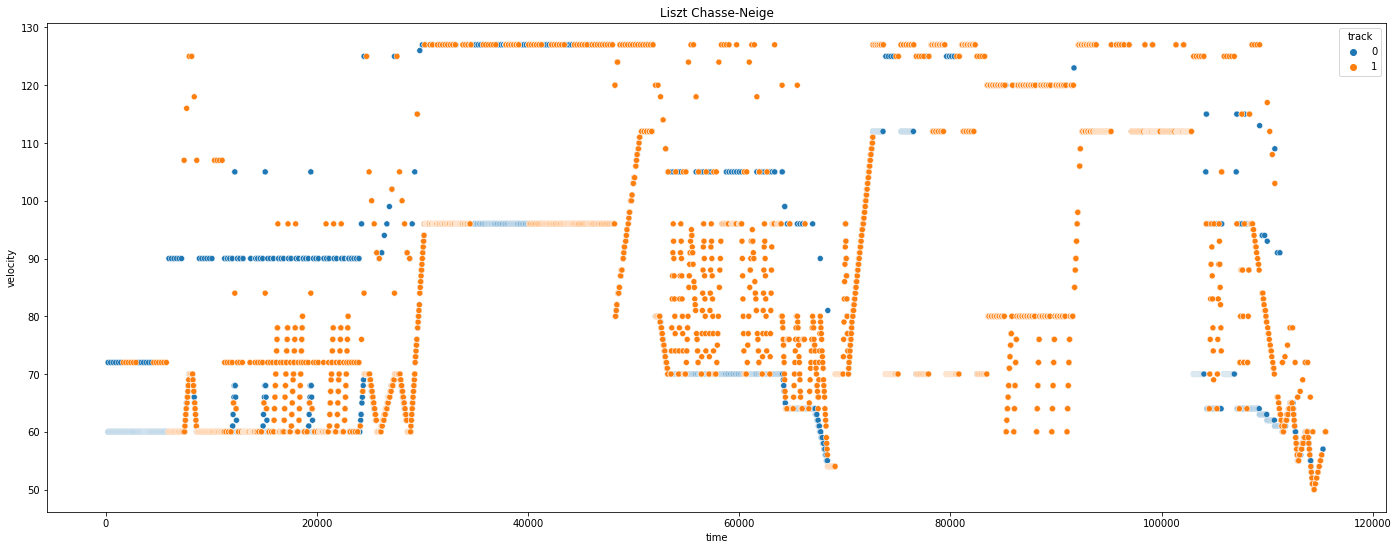

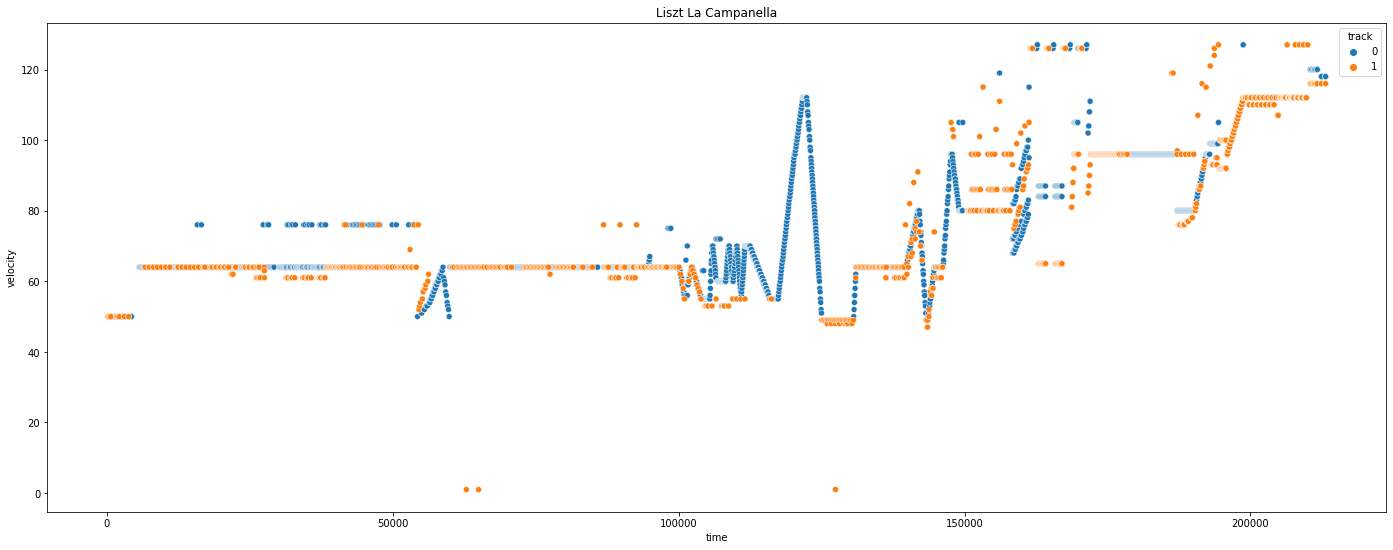

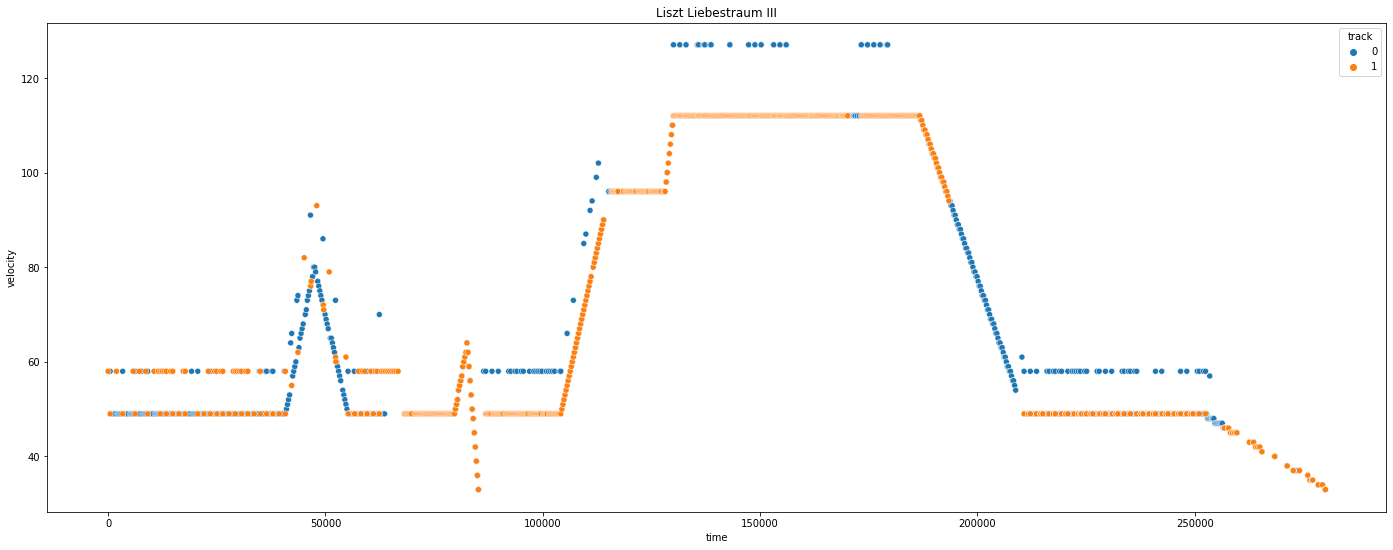

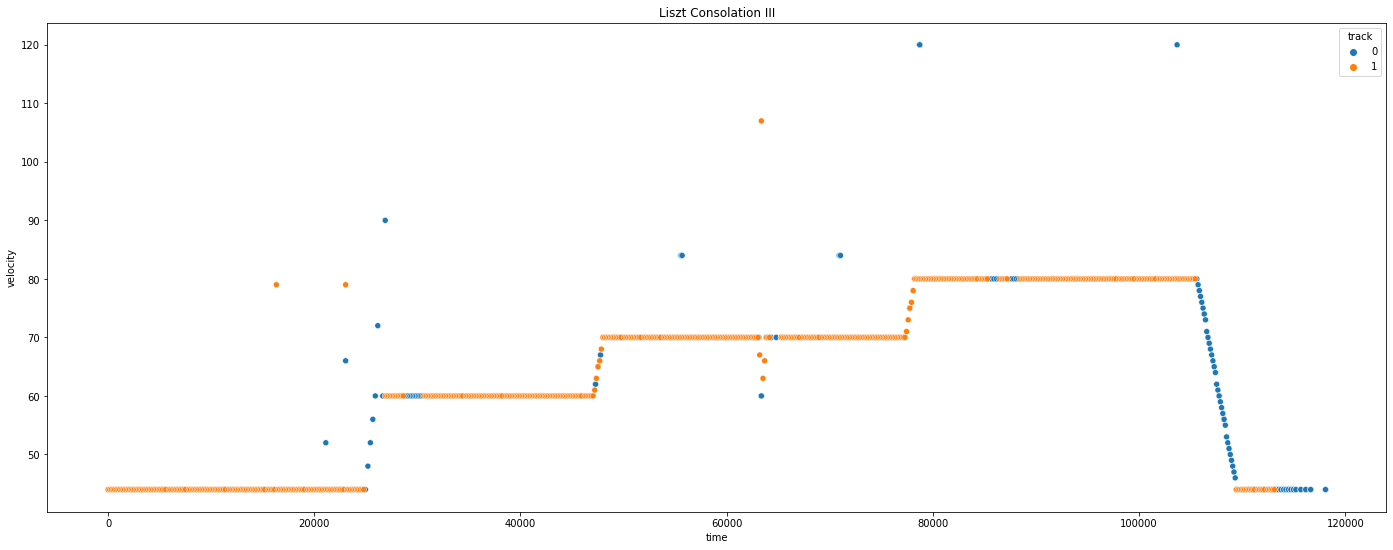

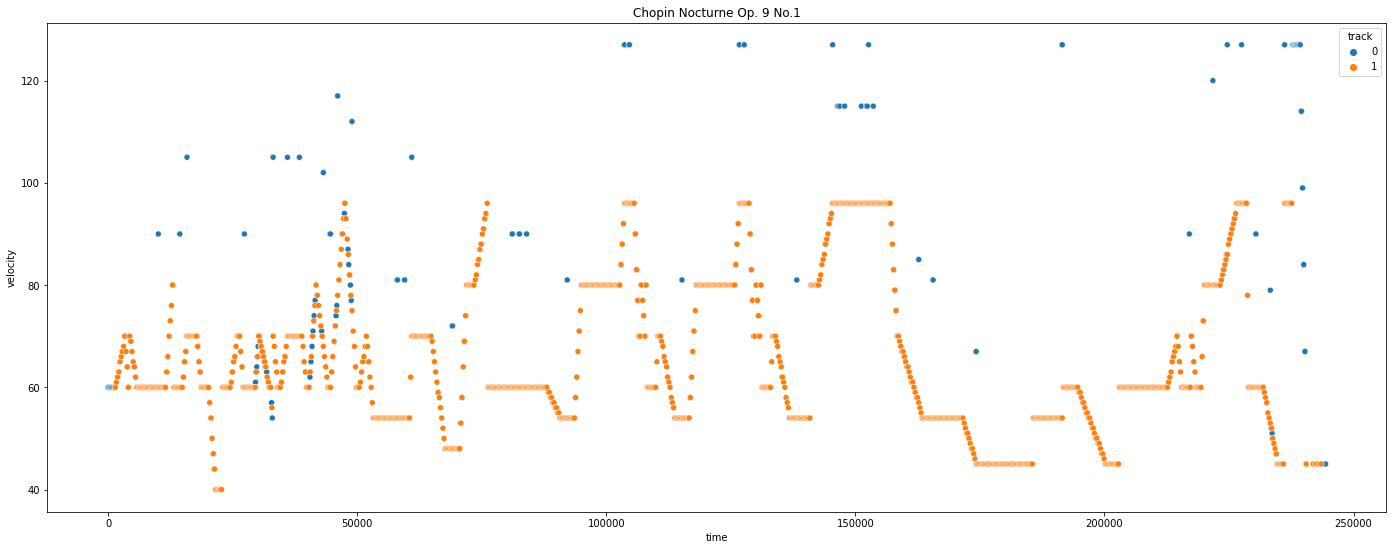

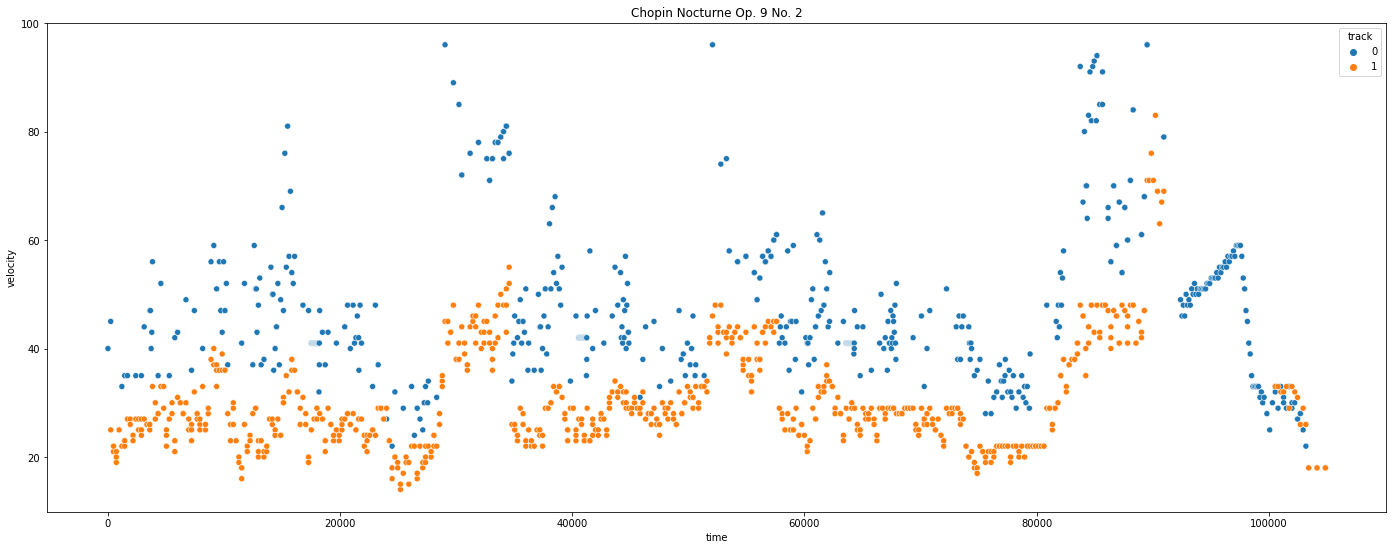

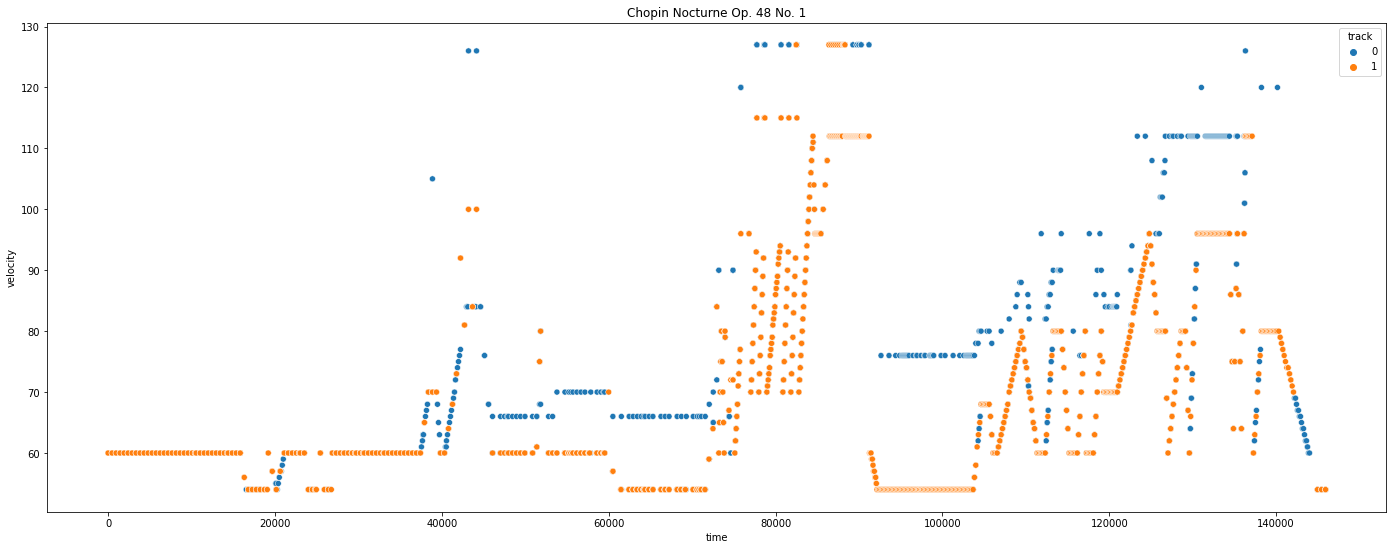

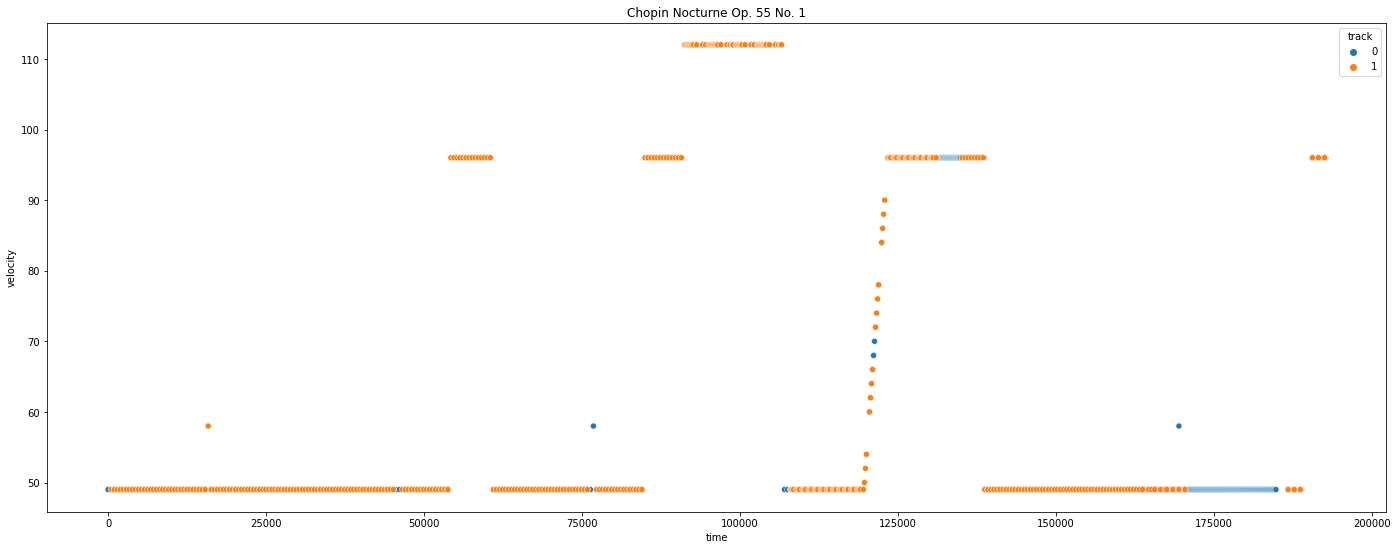

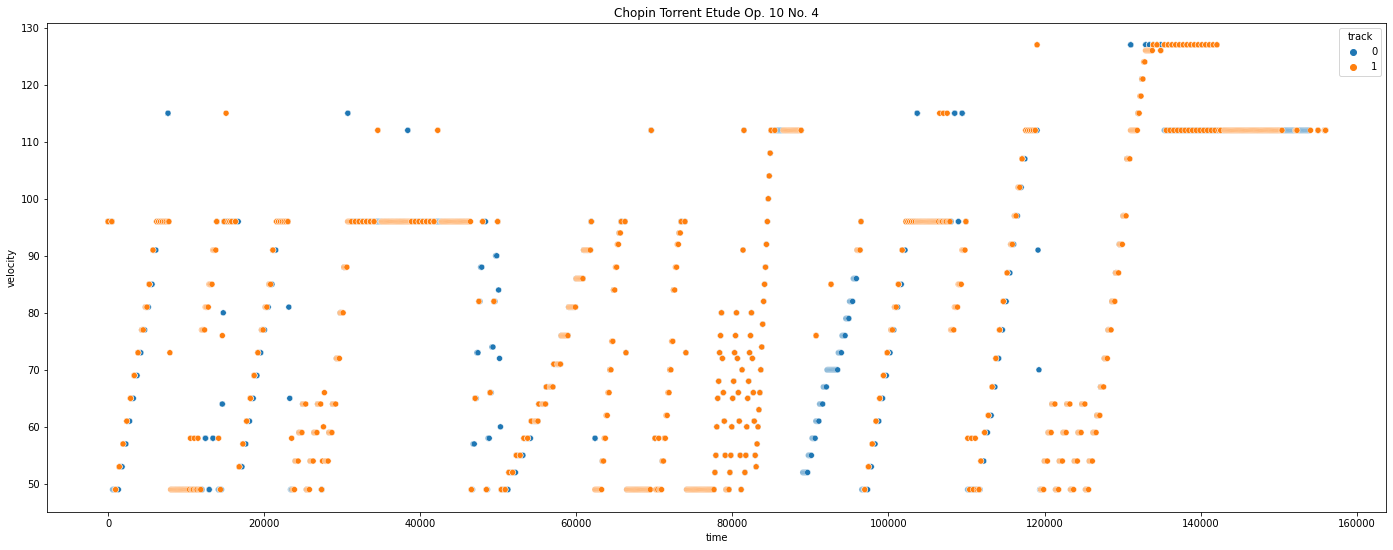

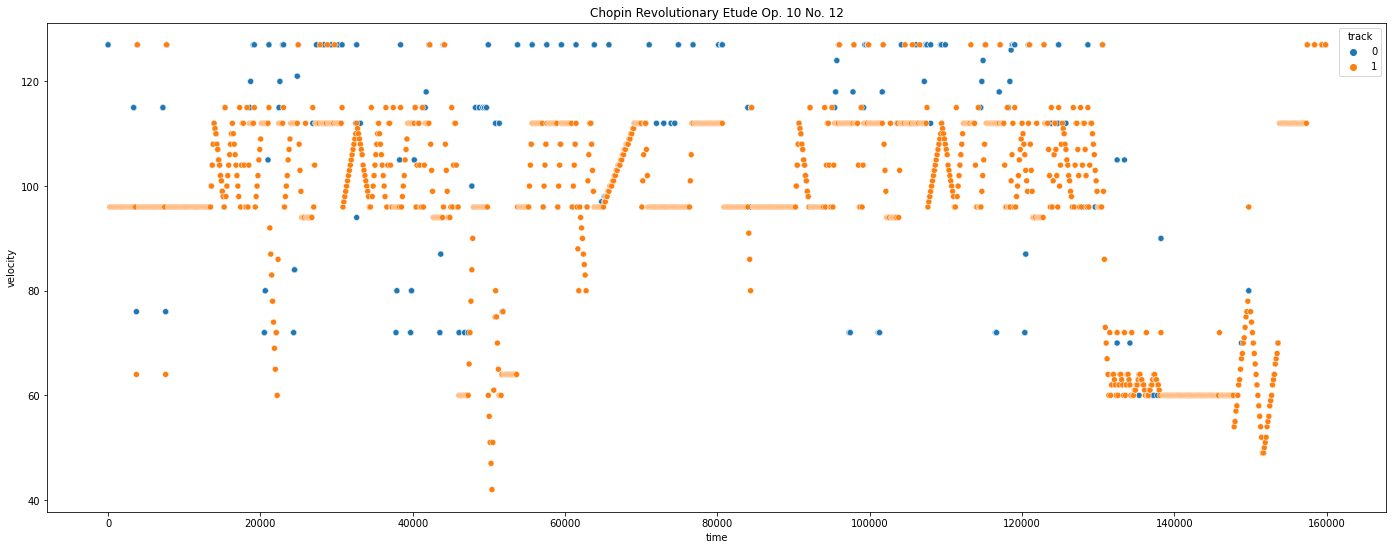

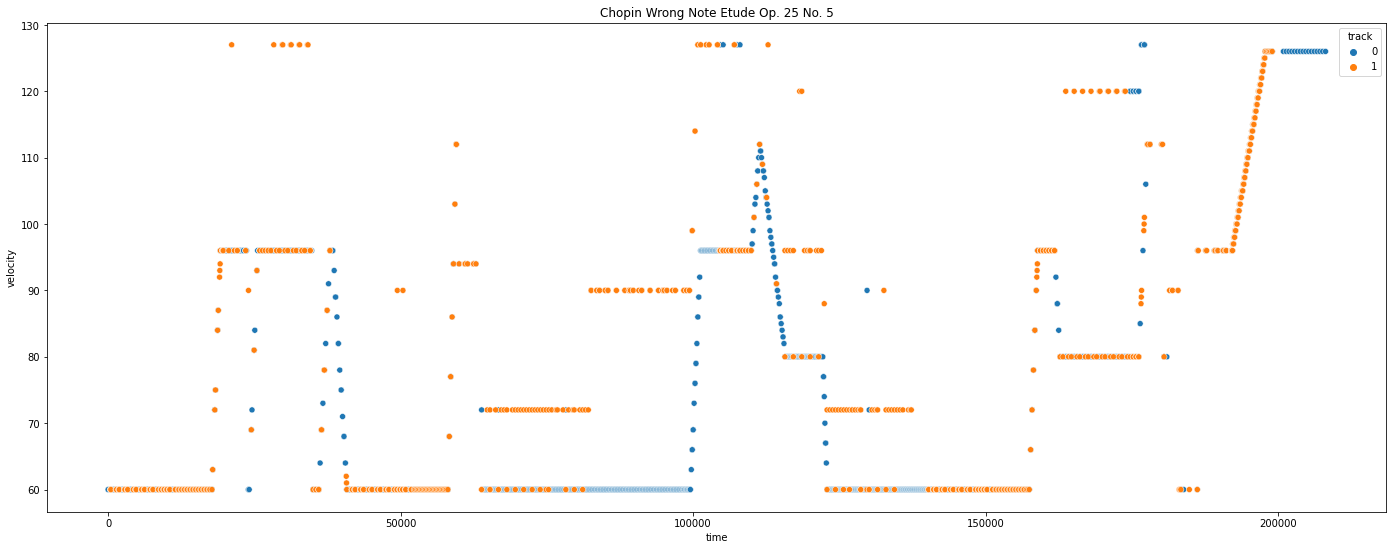

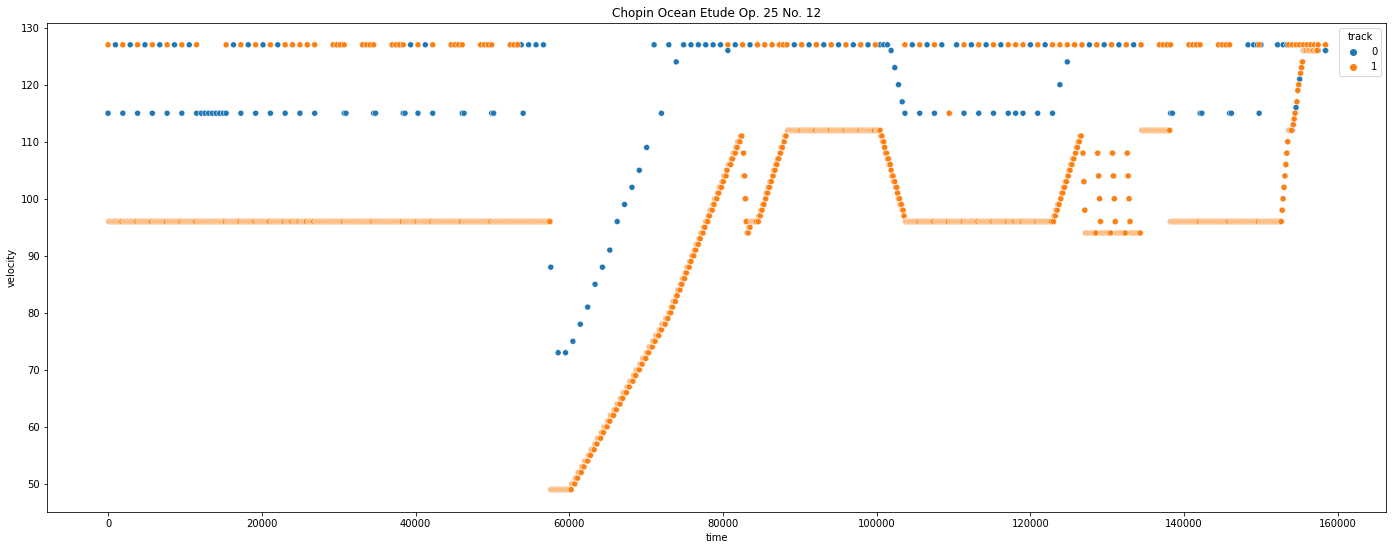

In [30]:
for index, (title, df) in enumerate(note_dict.items()):
    plot_velocity(df, title)

plt.show()

### Plotting notes over time

There aren't any clear observations I can make here that would make a lot of sense apart from saying

1. Bach's Music *looks* very structured
2. Rachmaninoff's and Liszt's Music looks very erratic
3. Liszt and Chopin *really* like Glissando's (a long, continuous chromatic scale)

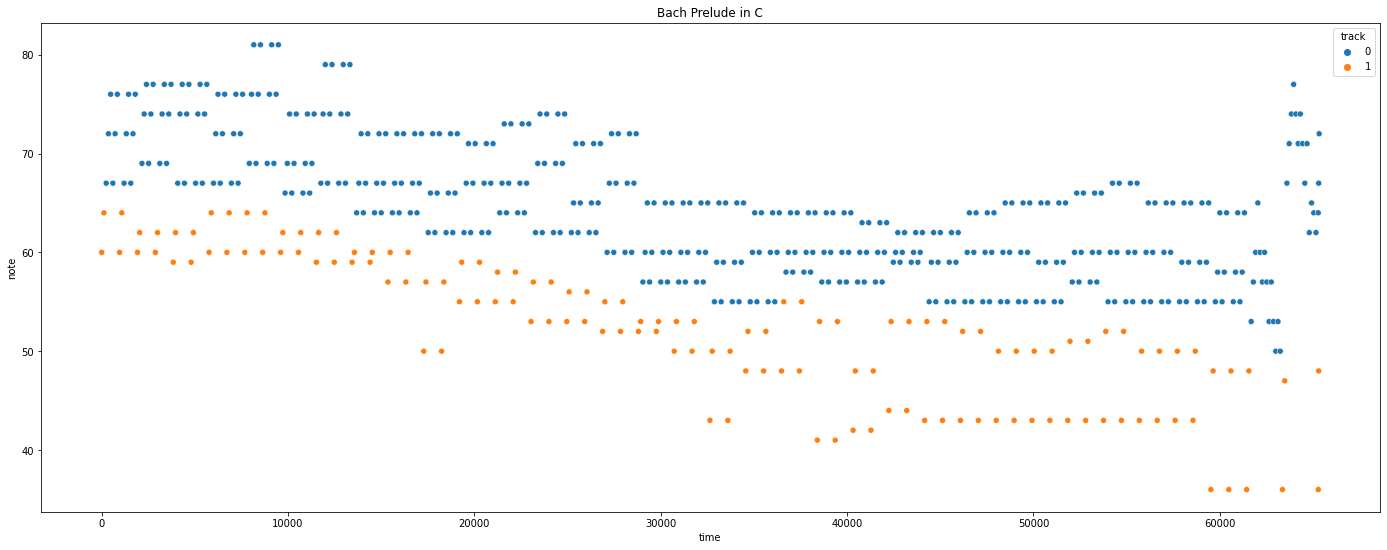

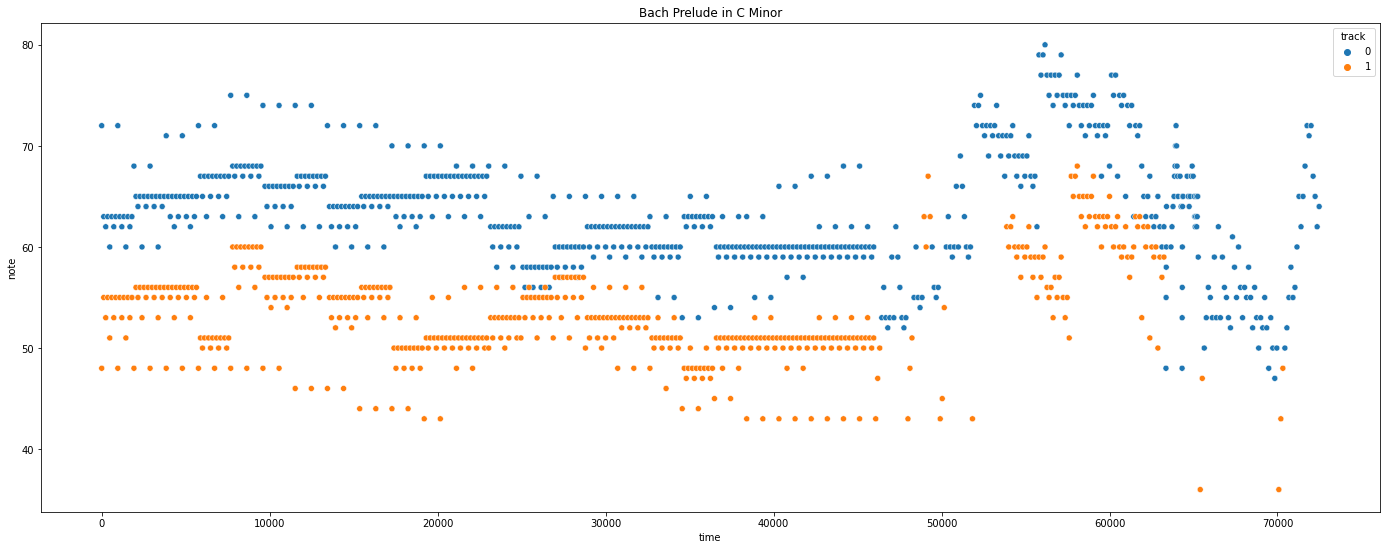

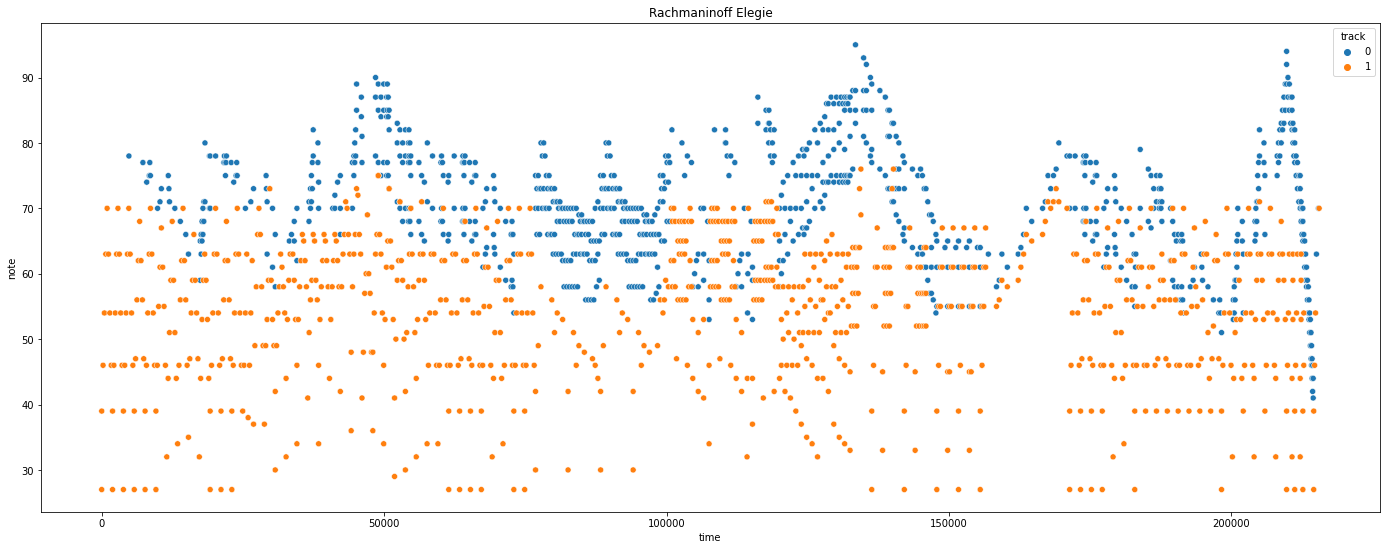

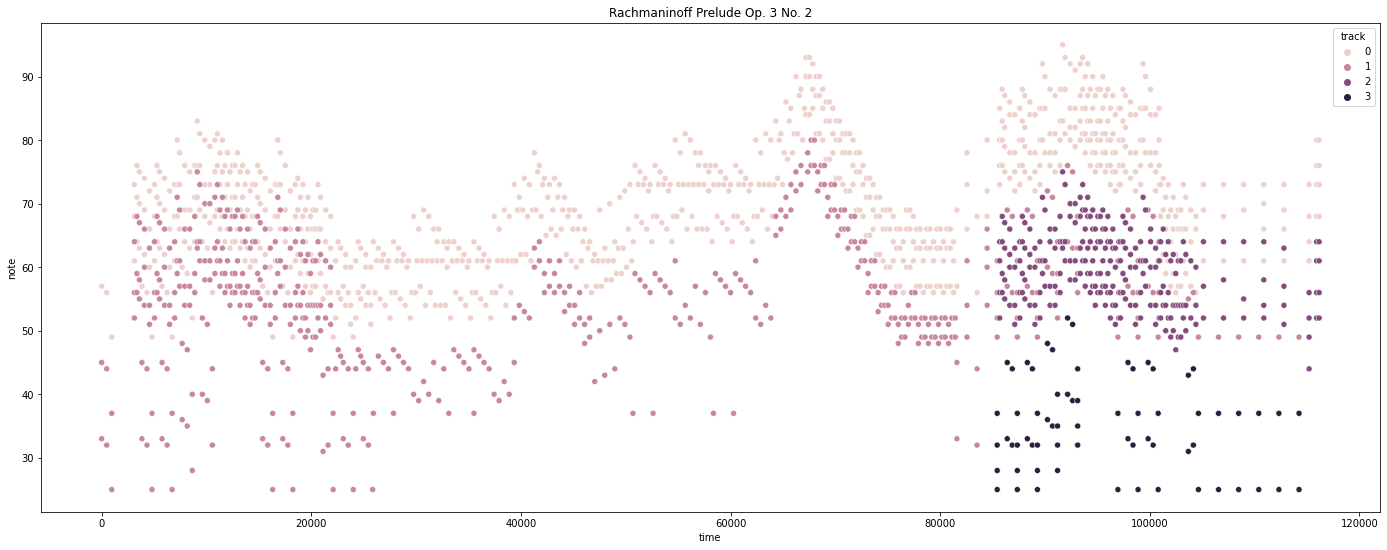

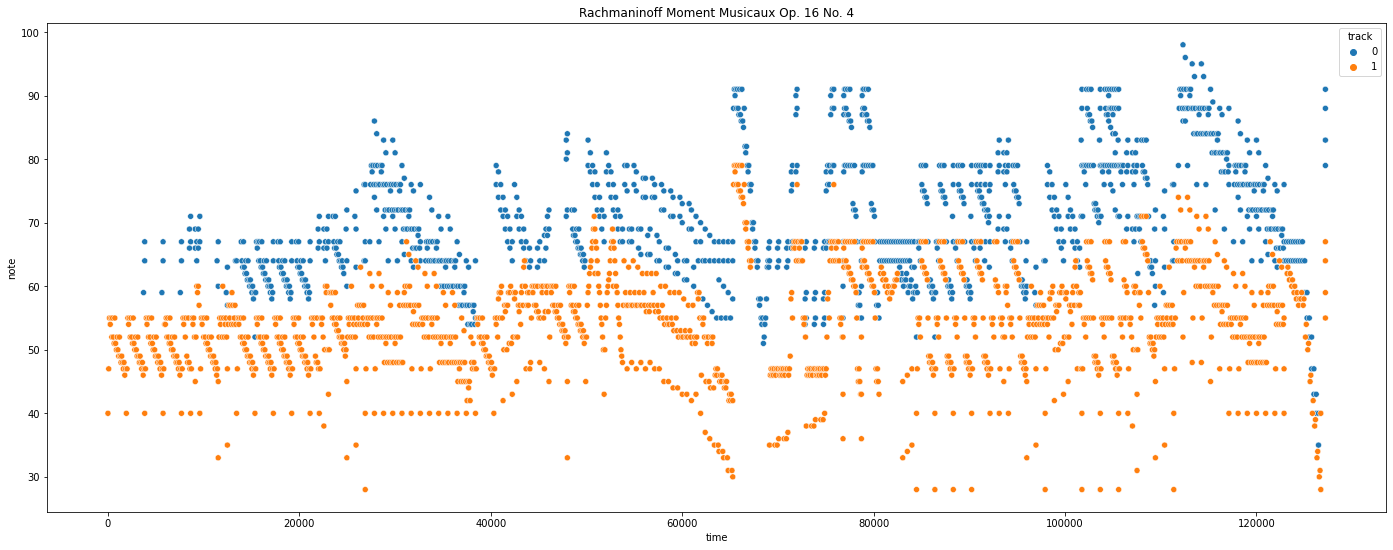

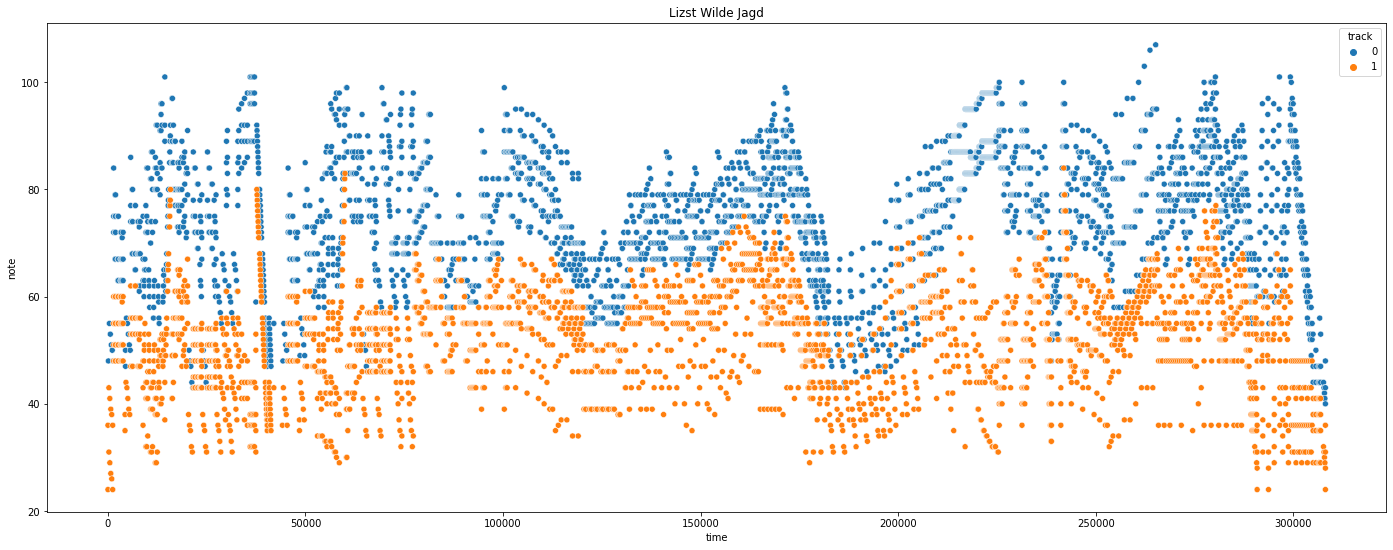

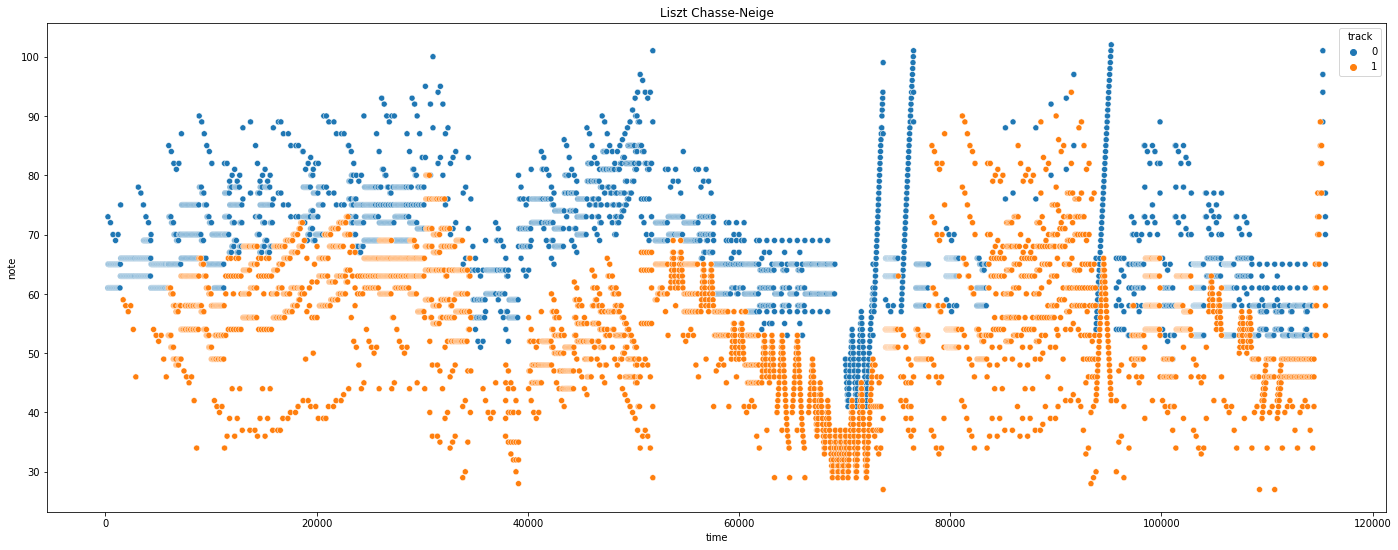

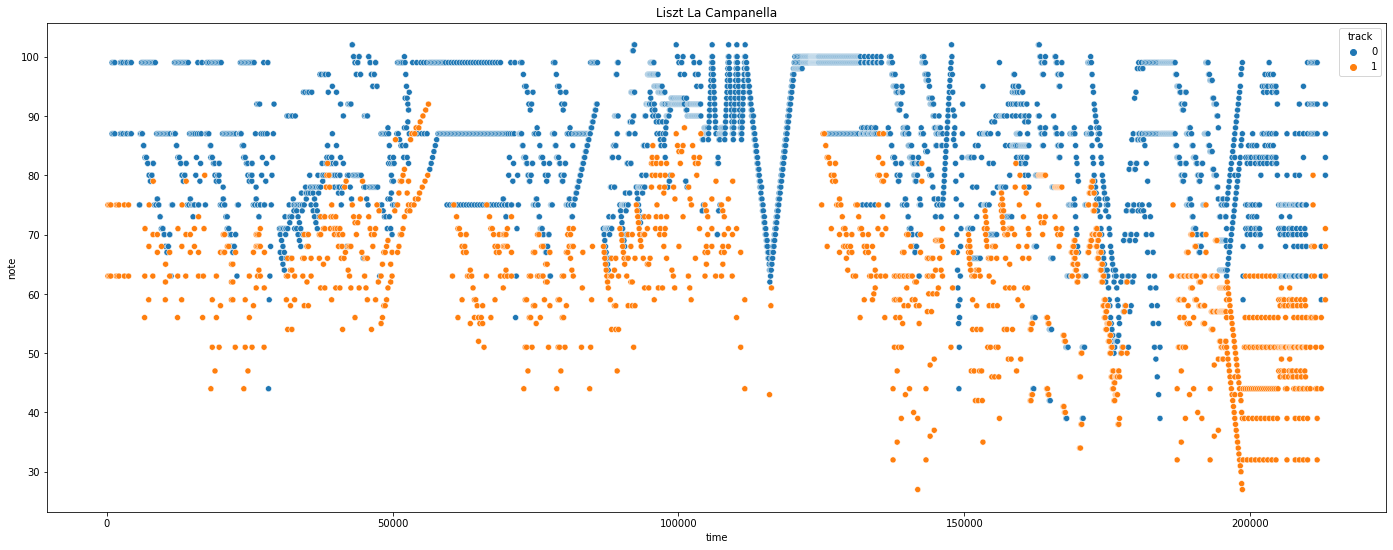

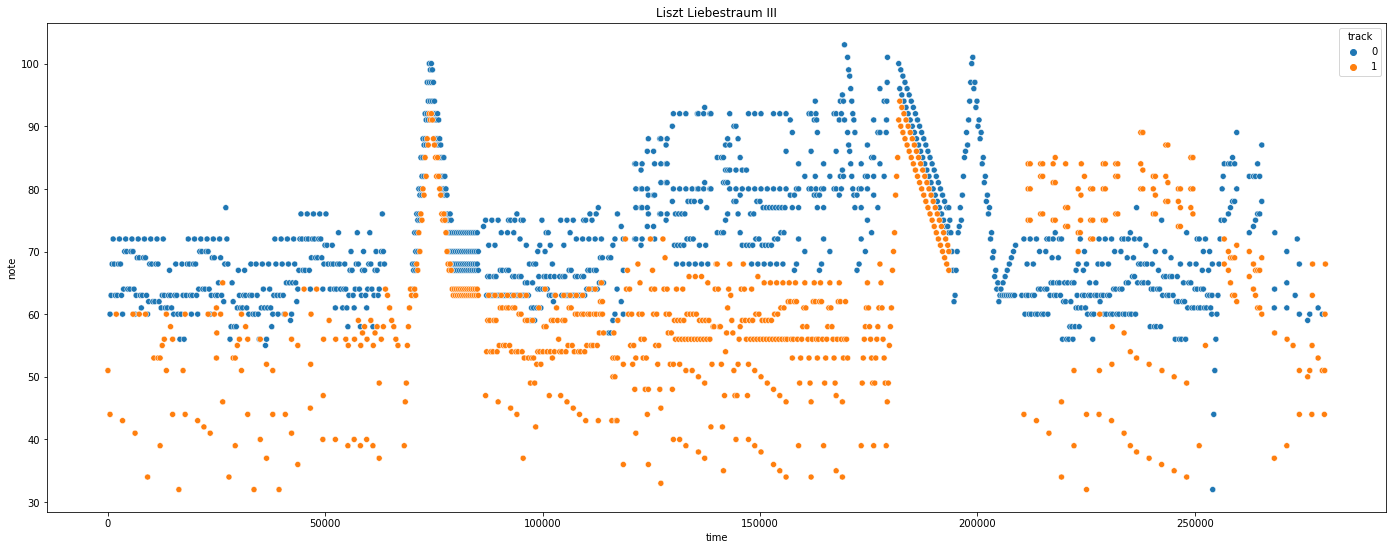

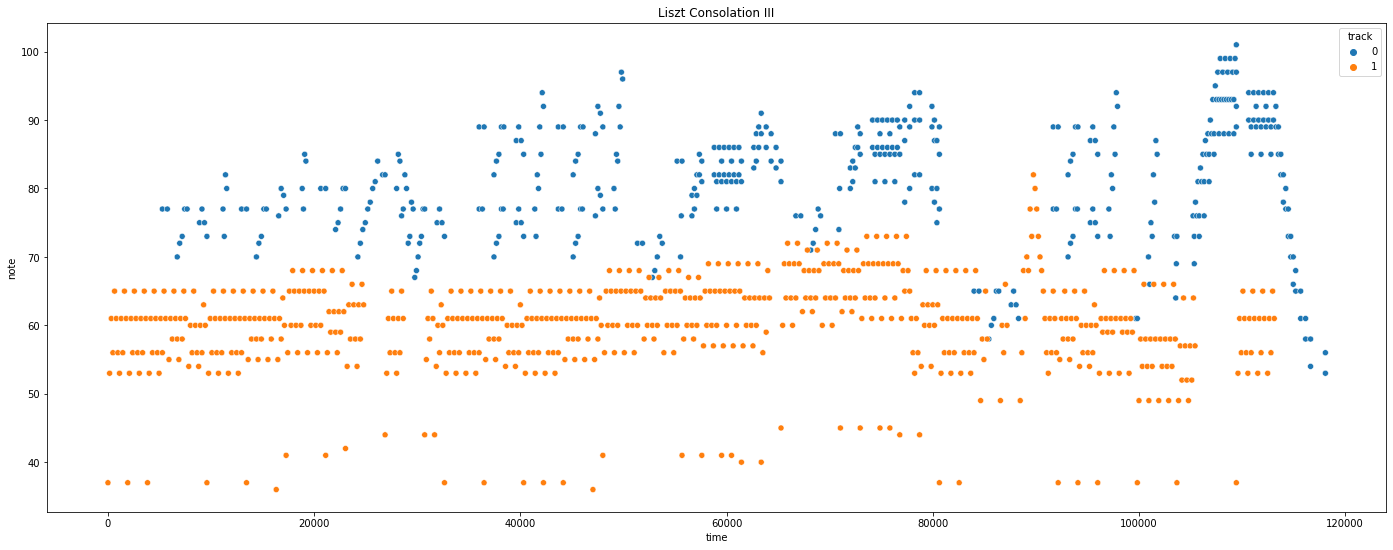

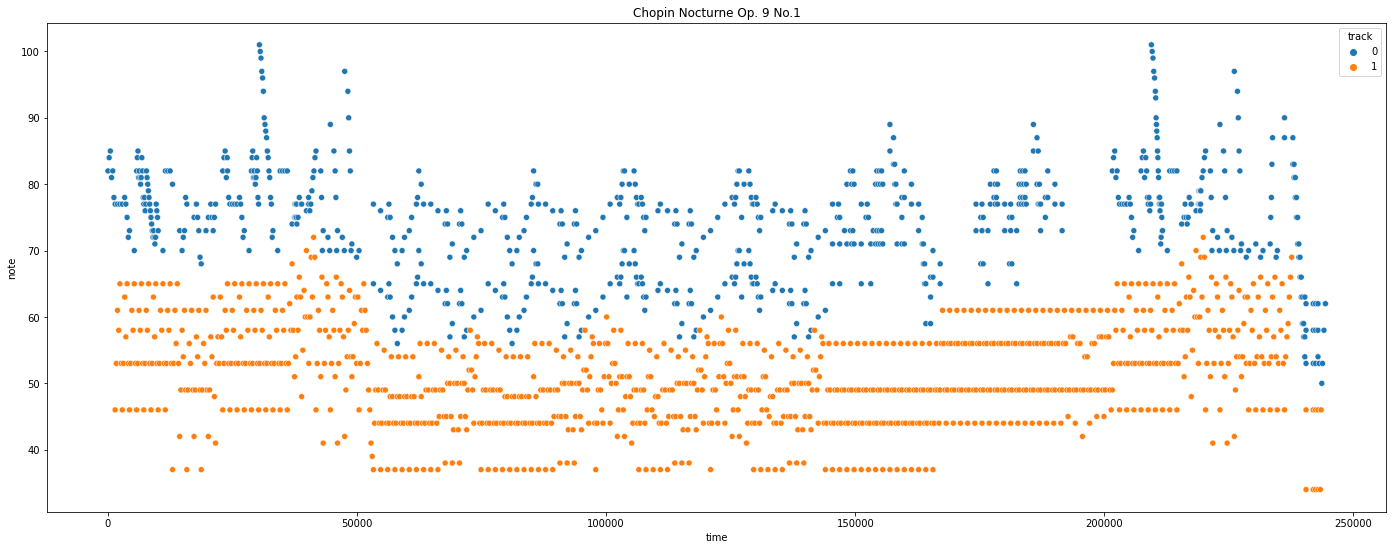

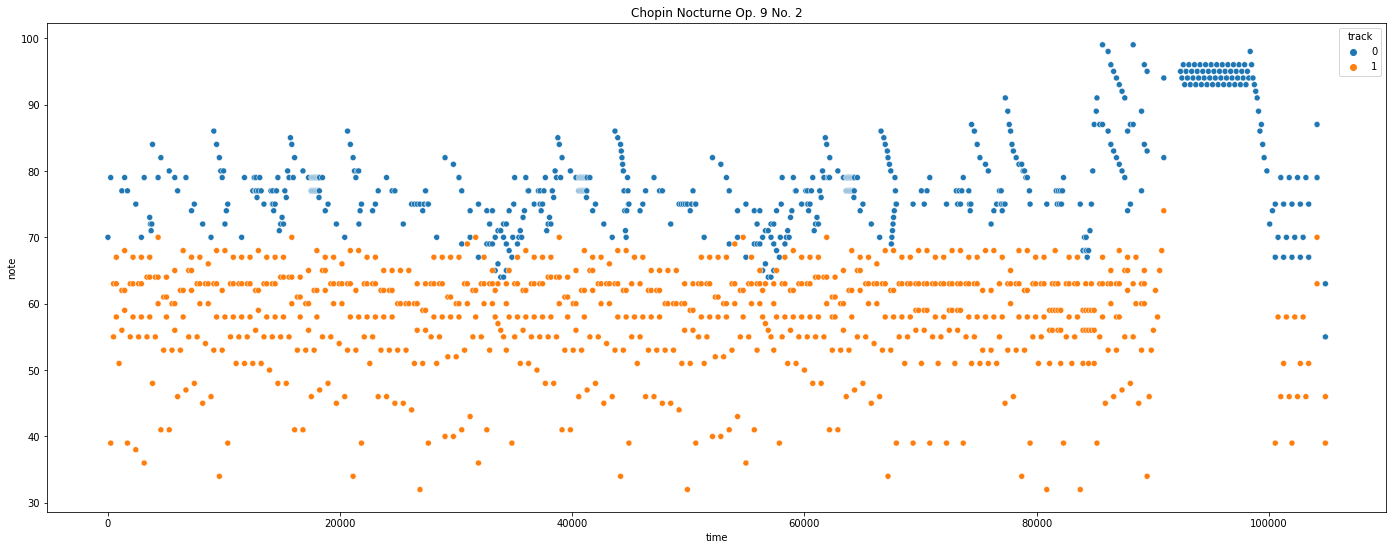

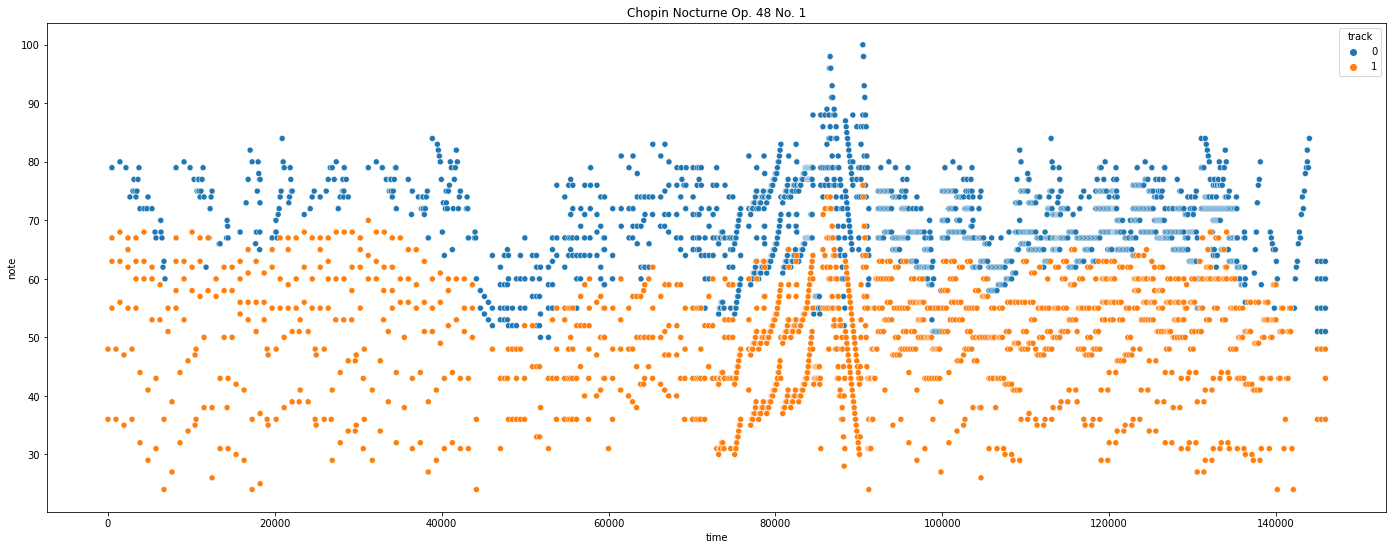

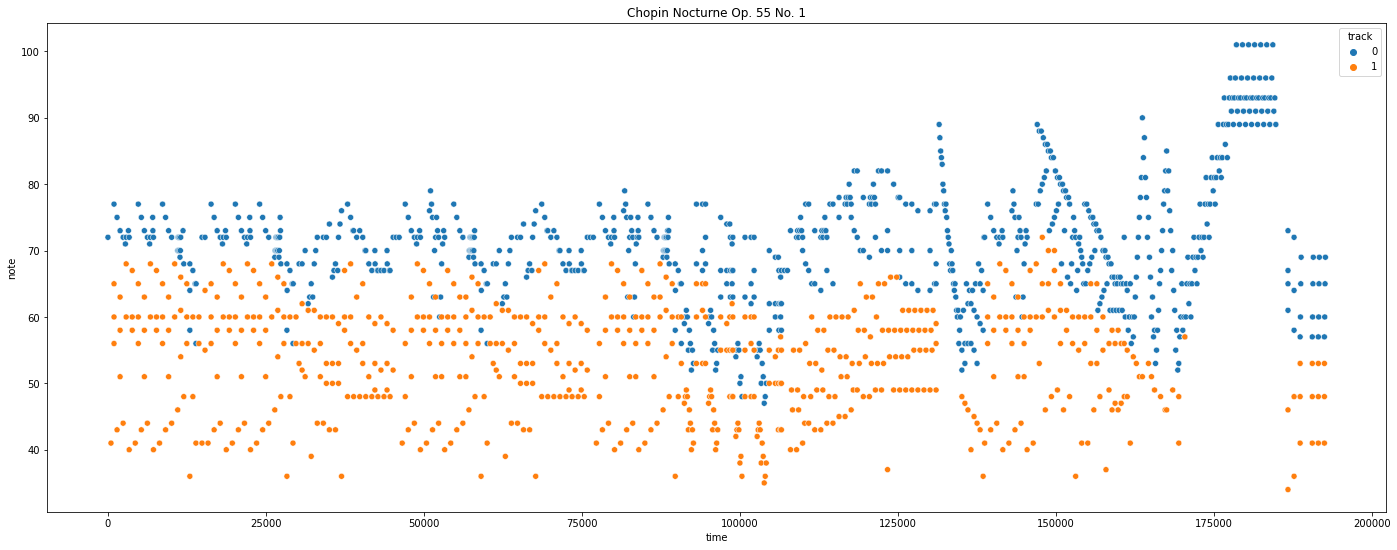

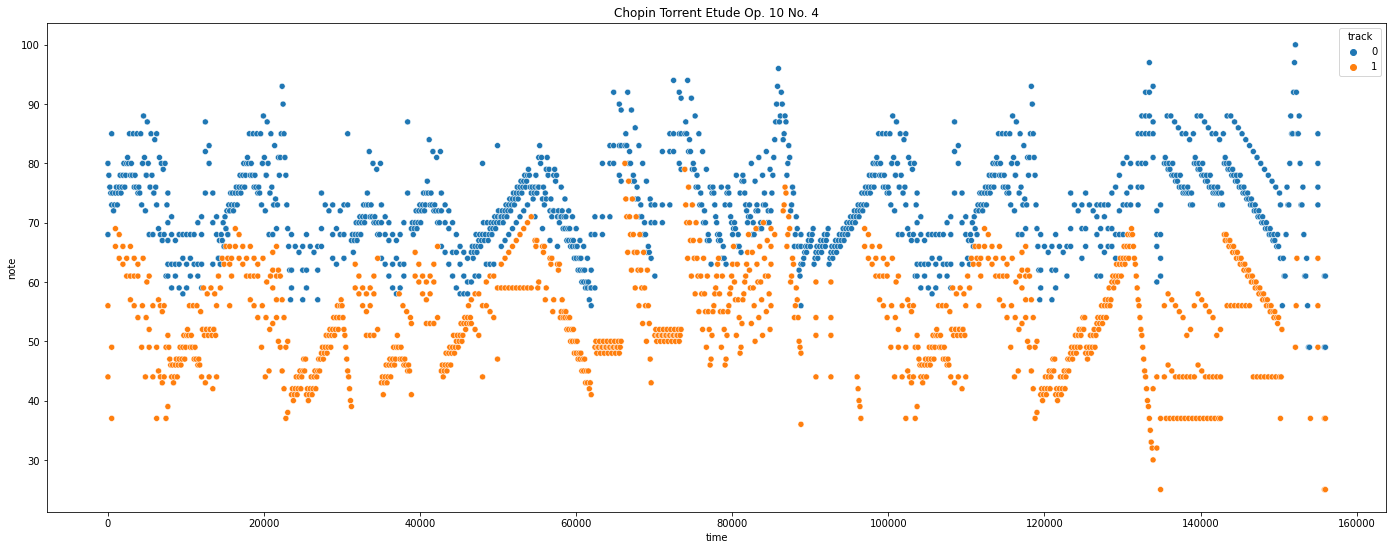

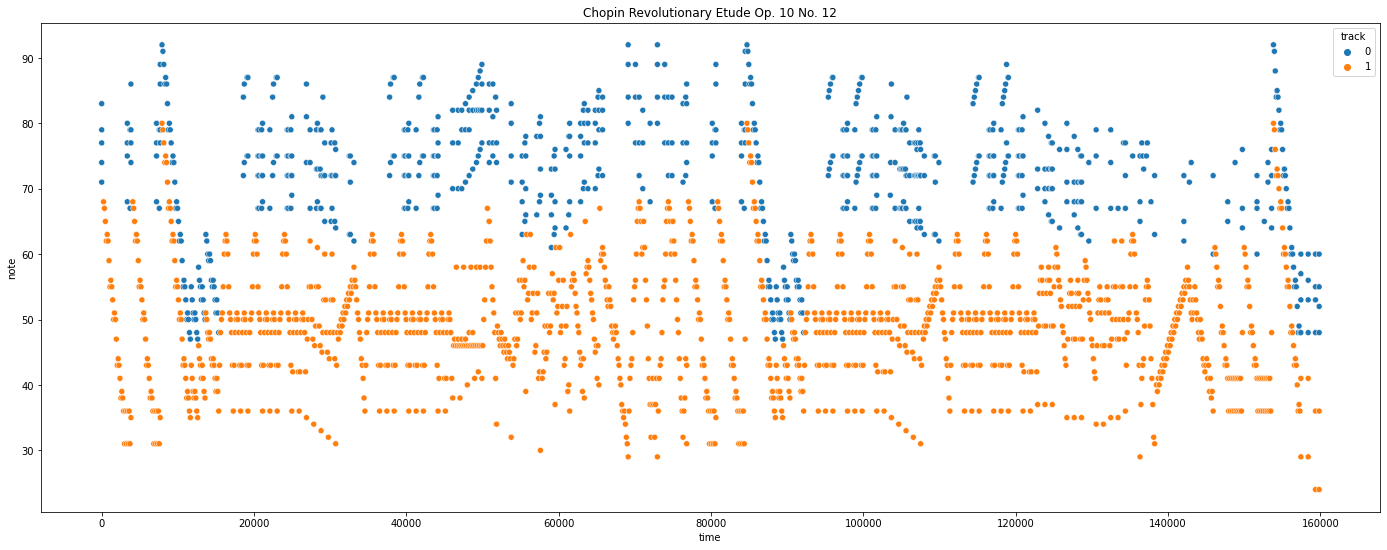

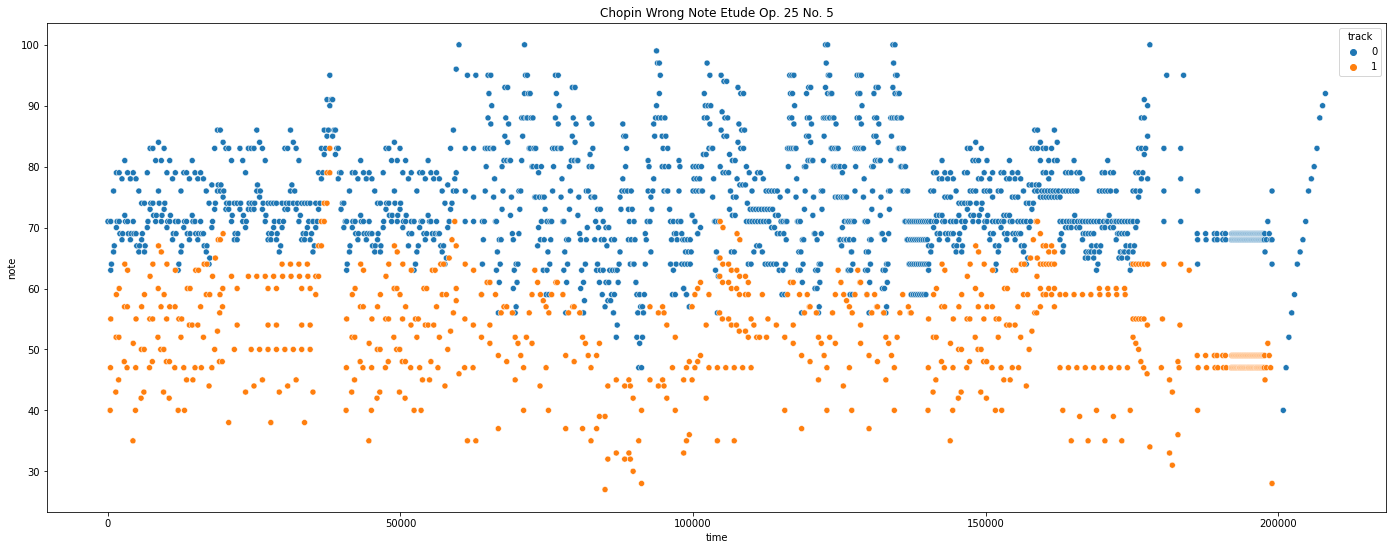

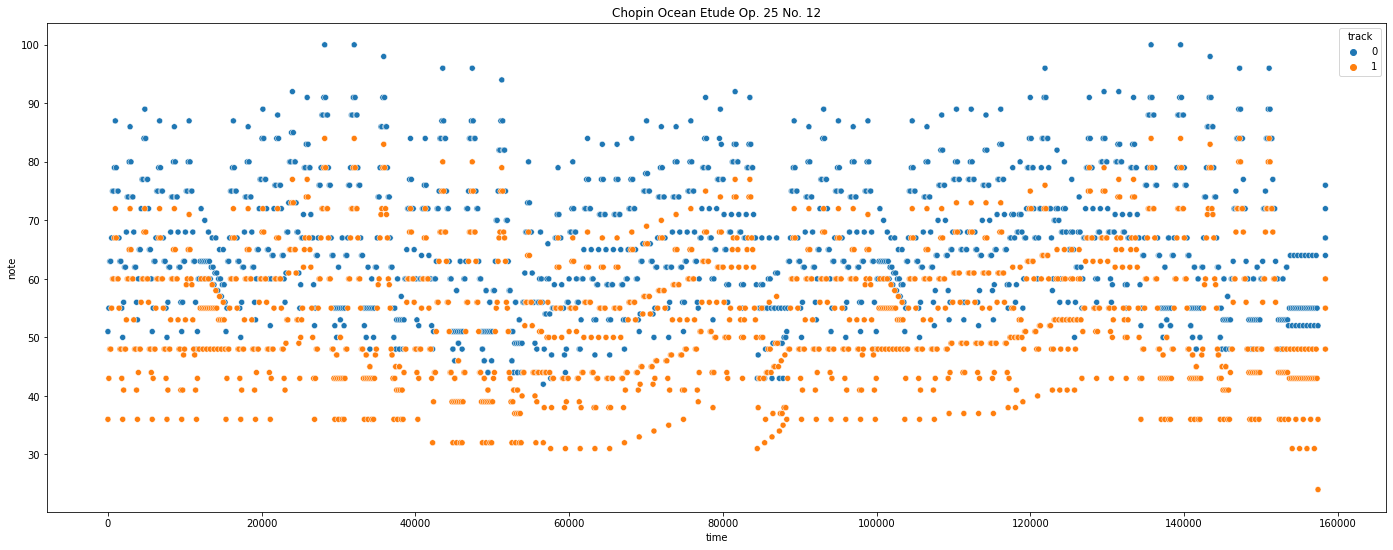

In [31]:
for index, (title, df) in enumerate(note_dict.items()):
    plot_notes(df, title)

plt.show()

### What note is being played how often?

I was hoping to get any hints here to see which key a piece is in without looking at its Midi Messages, since those are sometimes left out or wrong, but this does _not_ help as much. Having played a couple of these pieces or listened to, these graphs make somewhat sense and aren't very surprising - especially La Campanella's prominent Eb (denoted as D#) here.

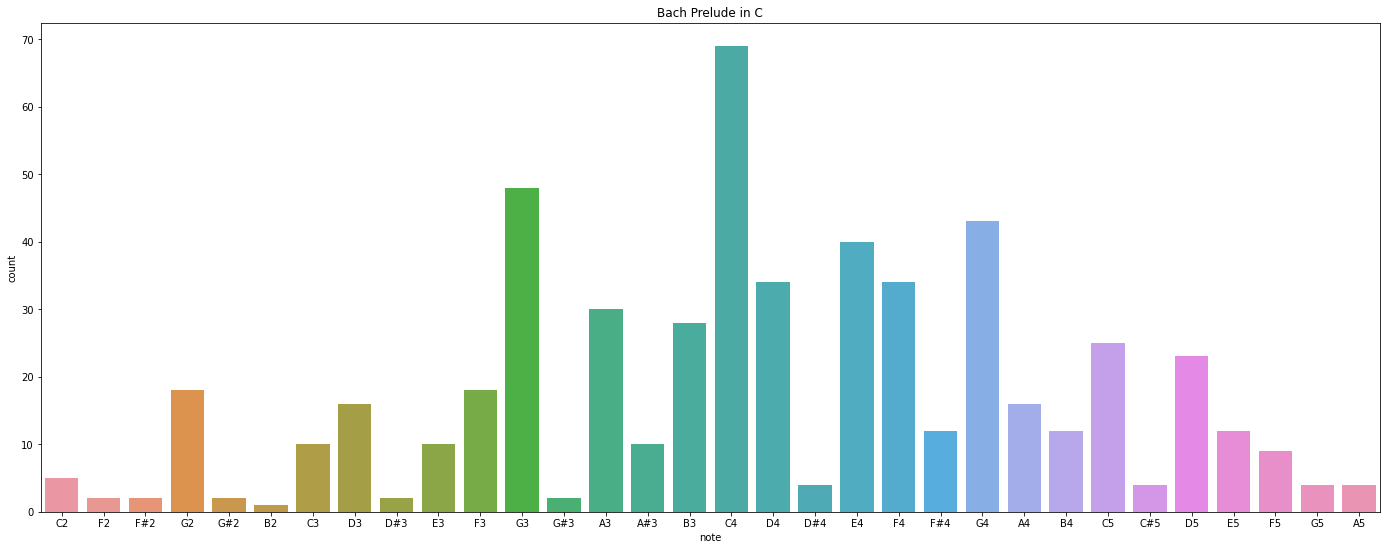

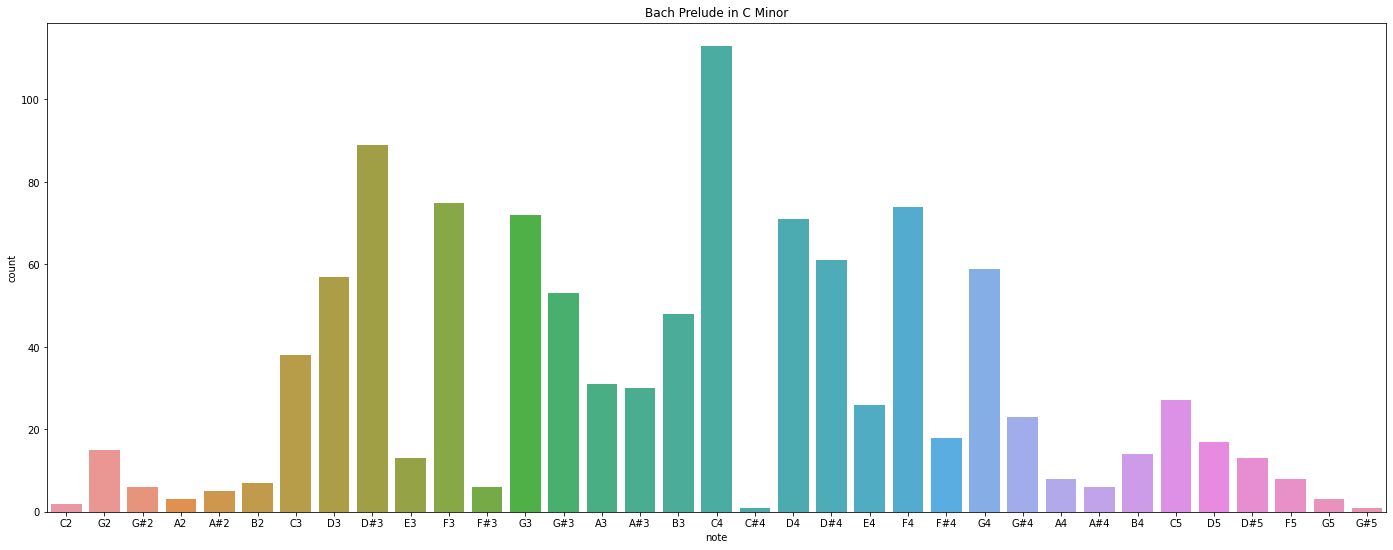

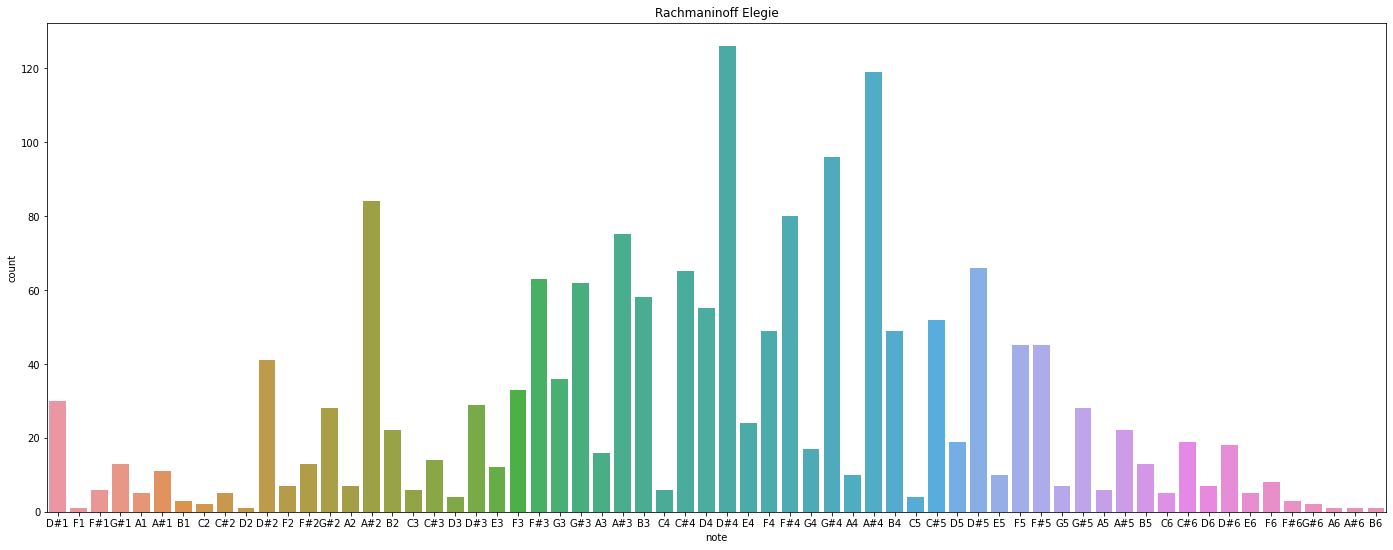

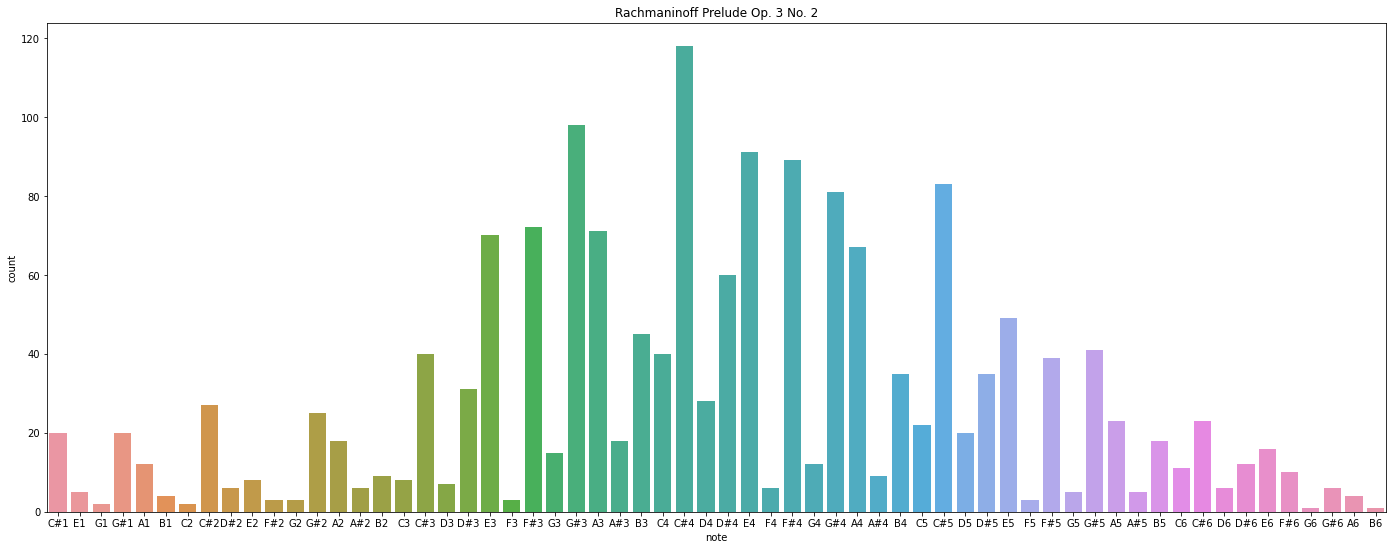

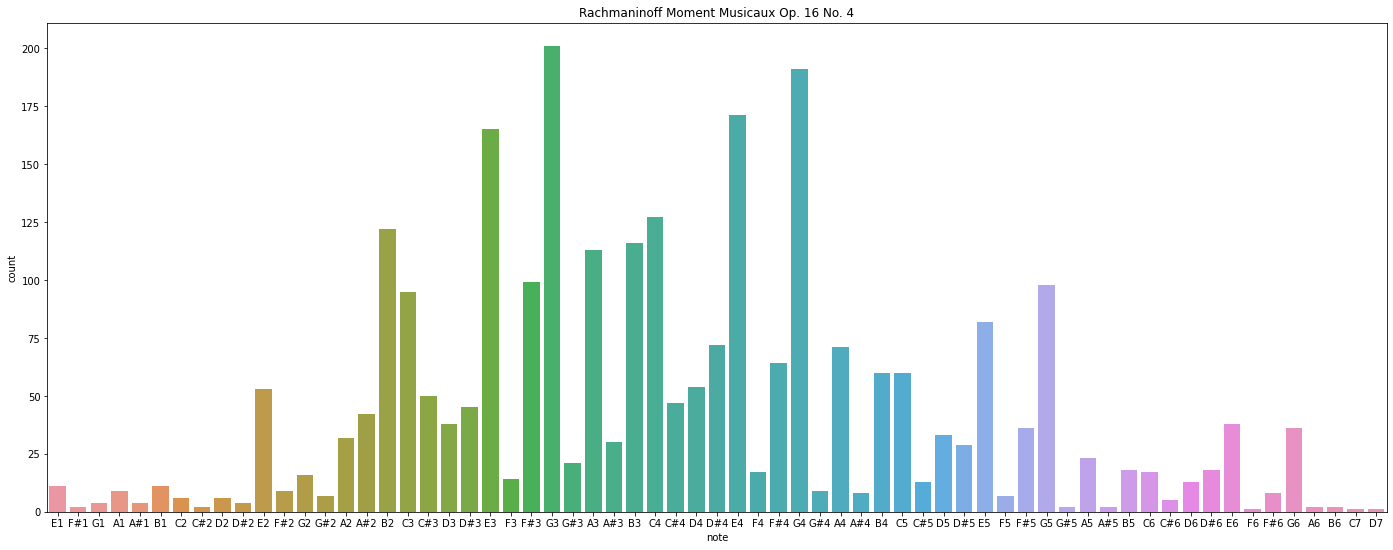

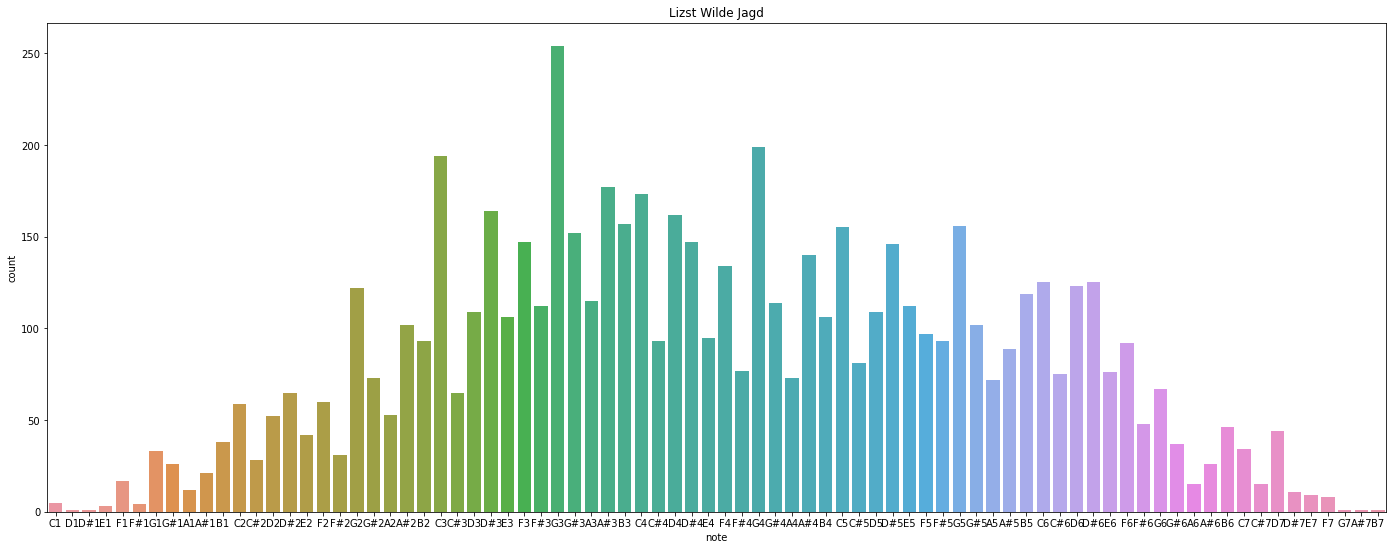

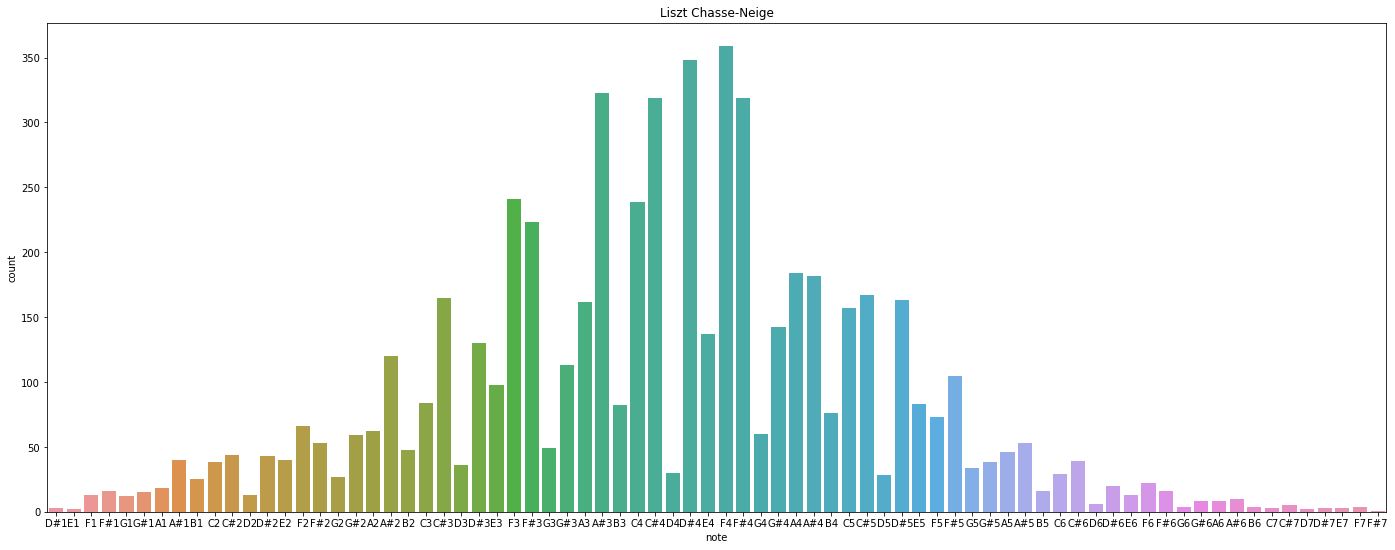

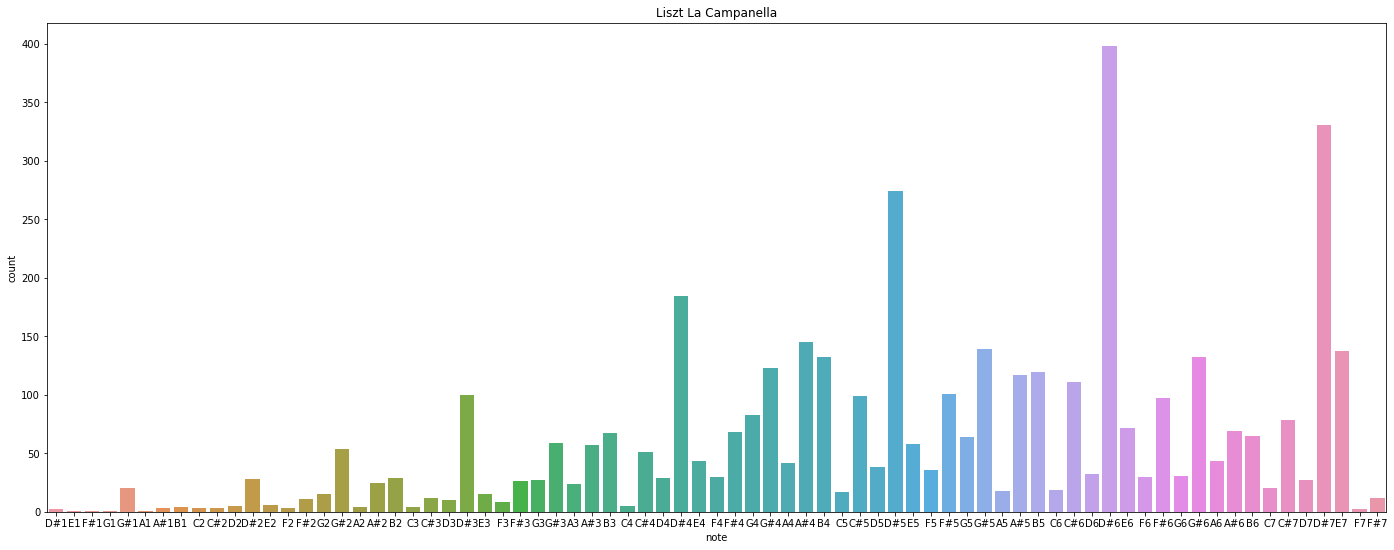

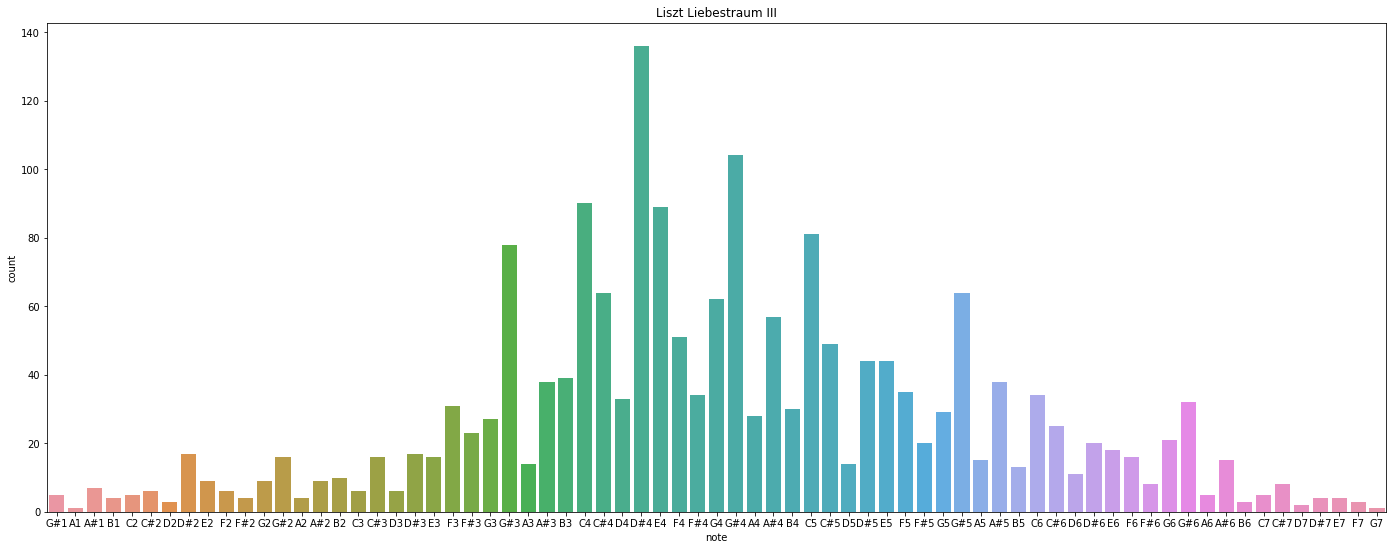

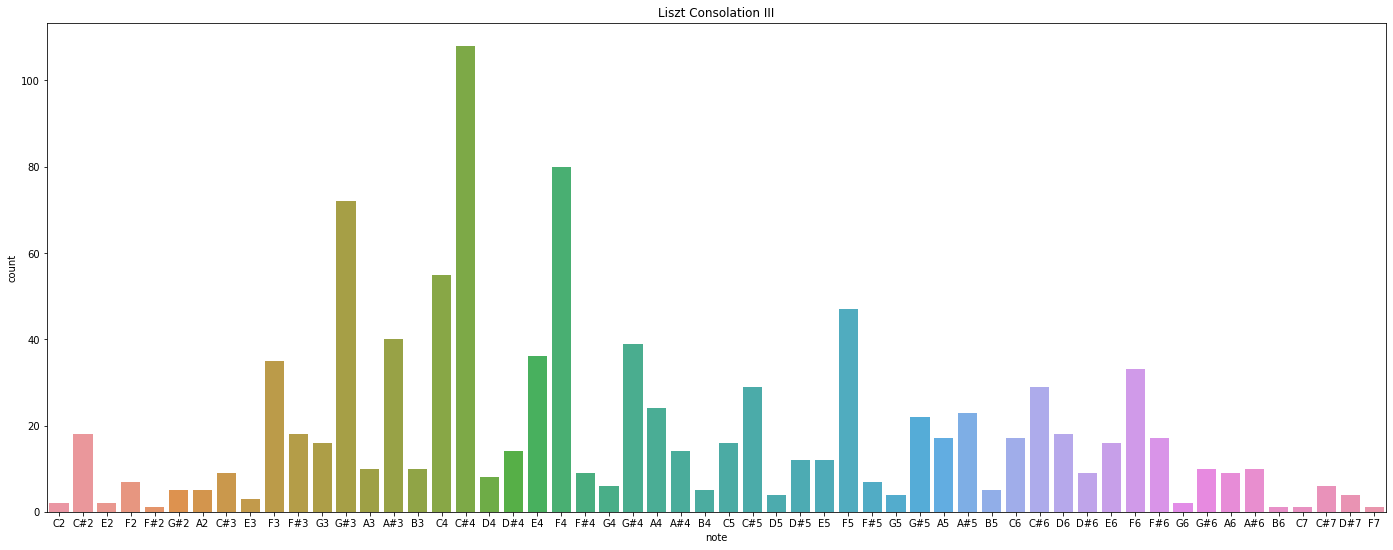

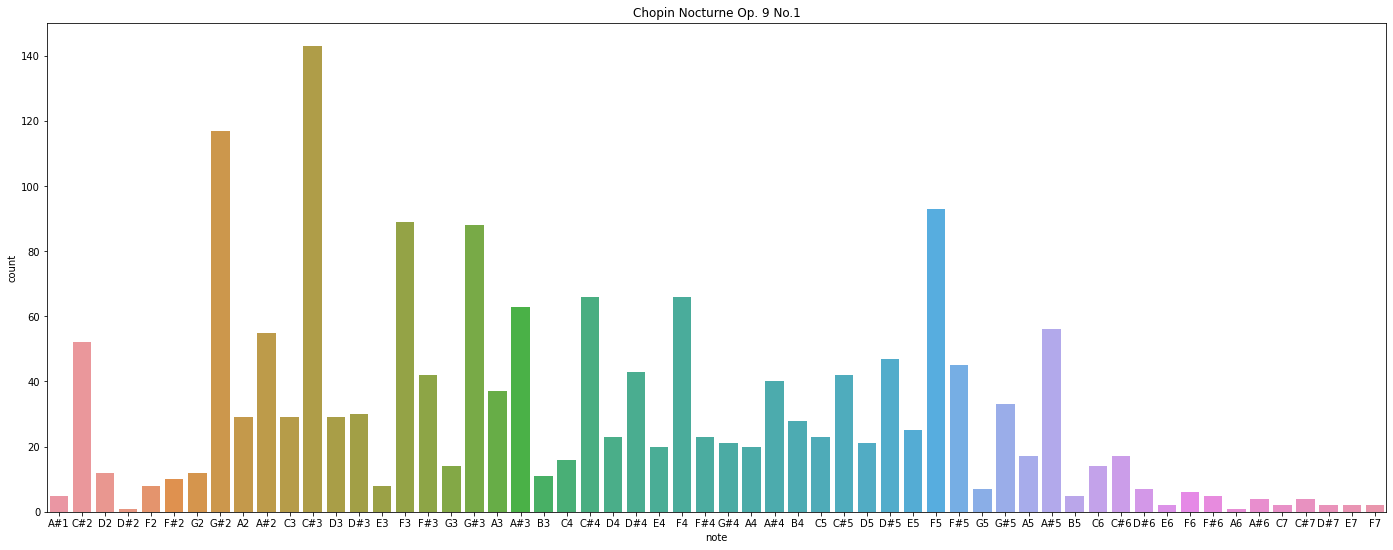

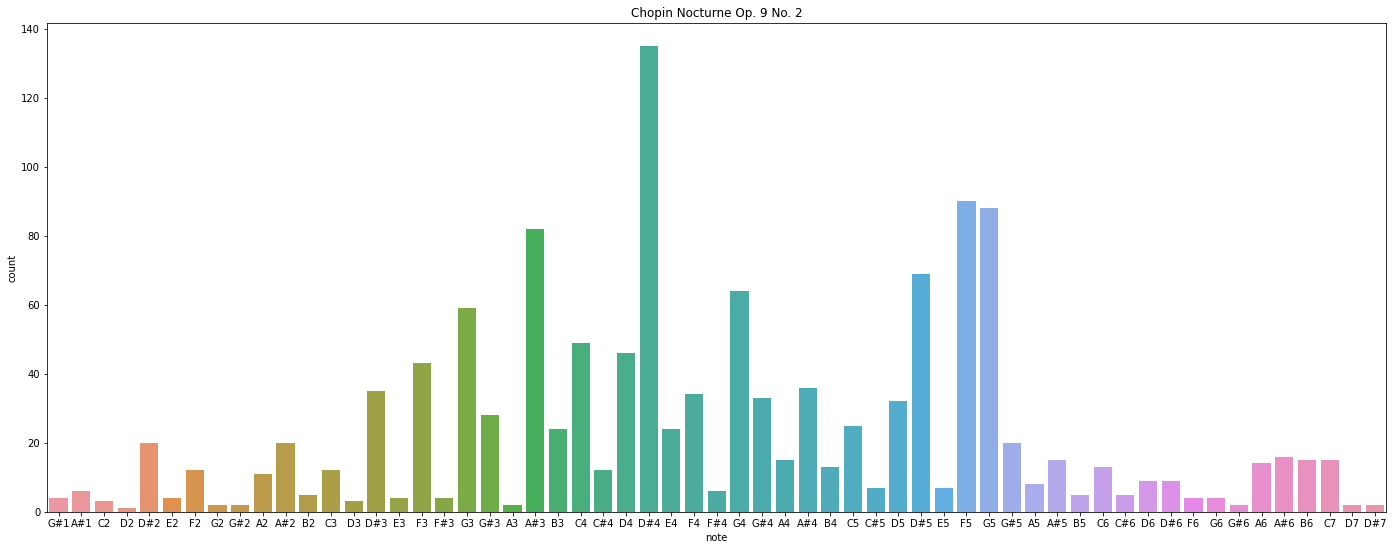

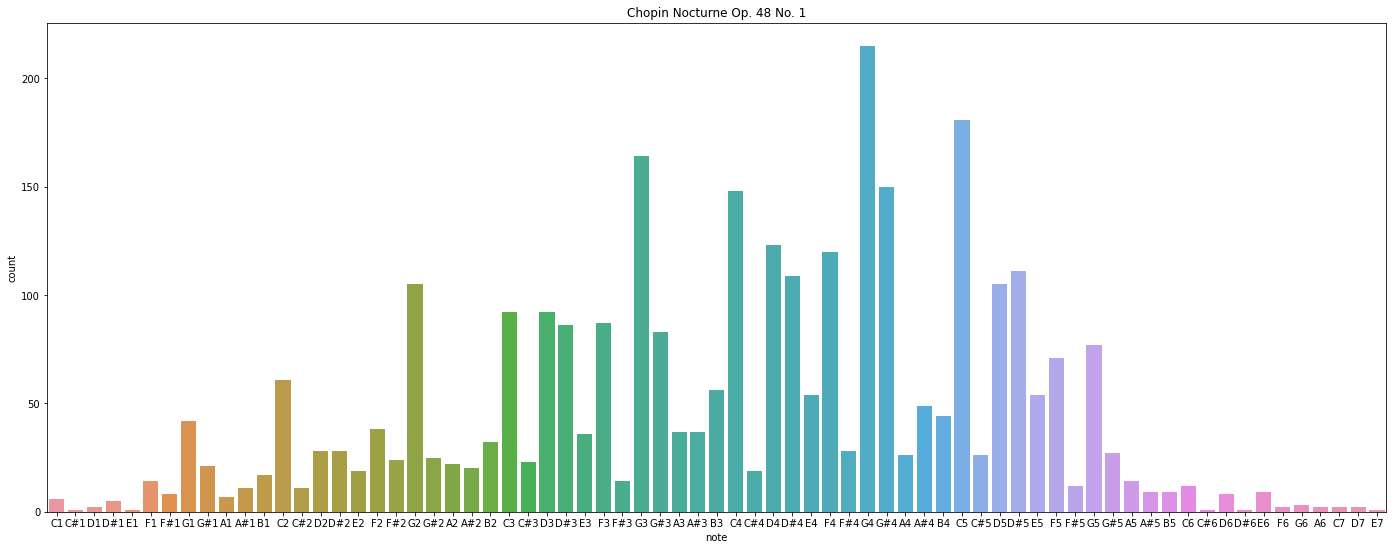

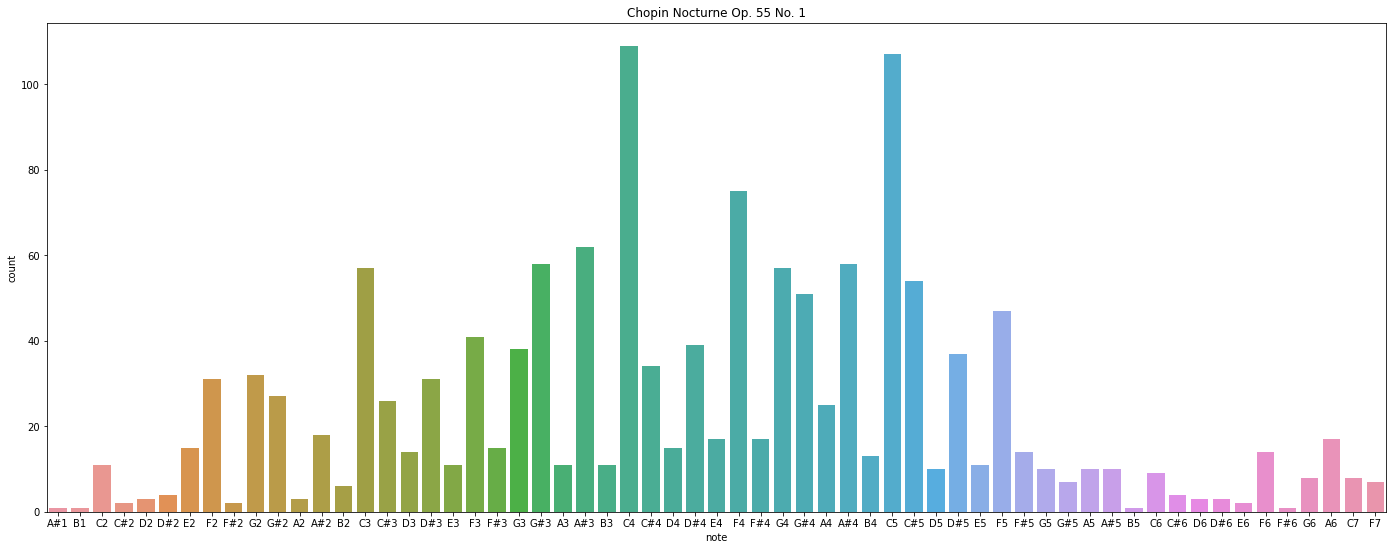

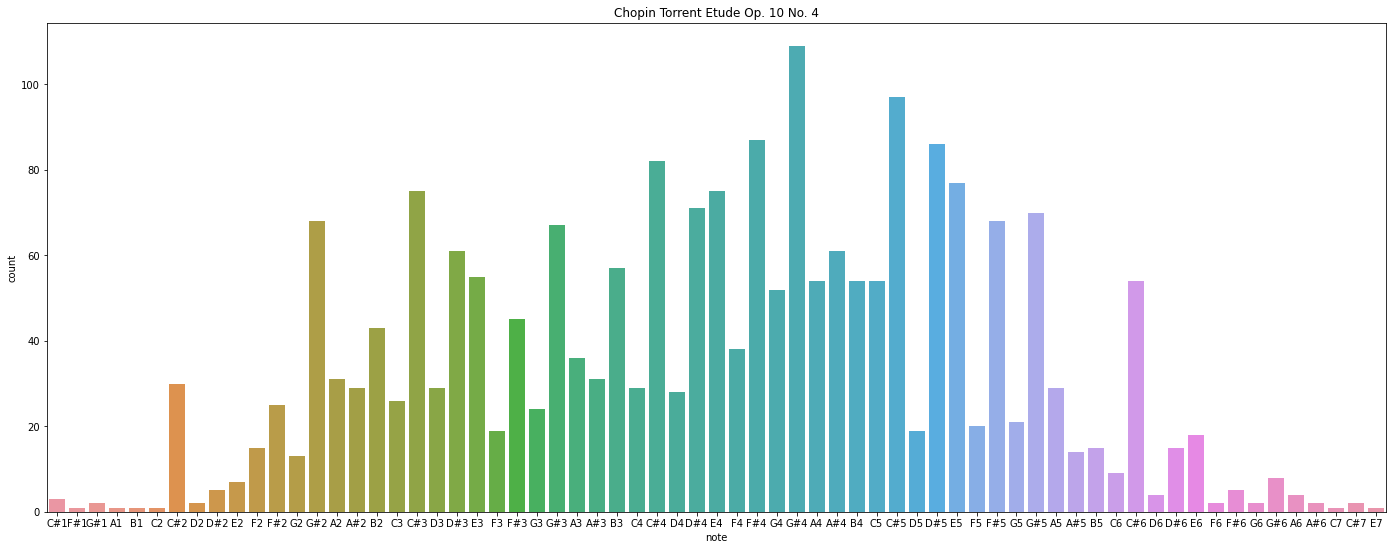

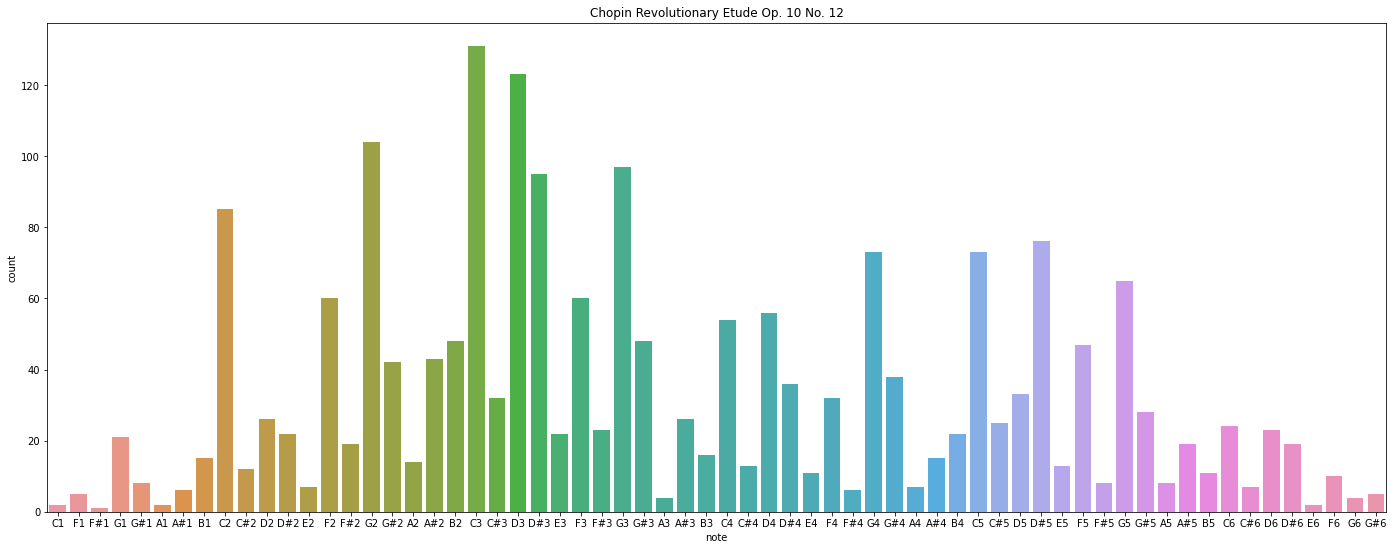

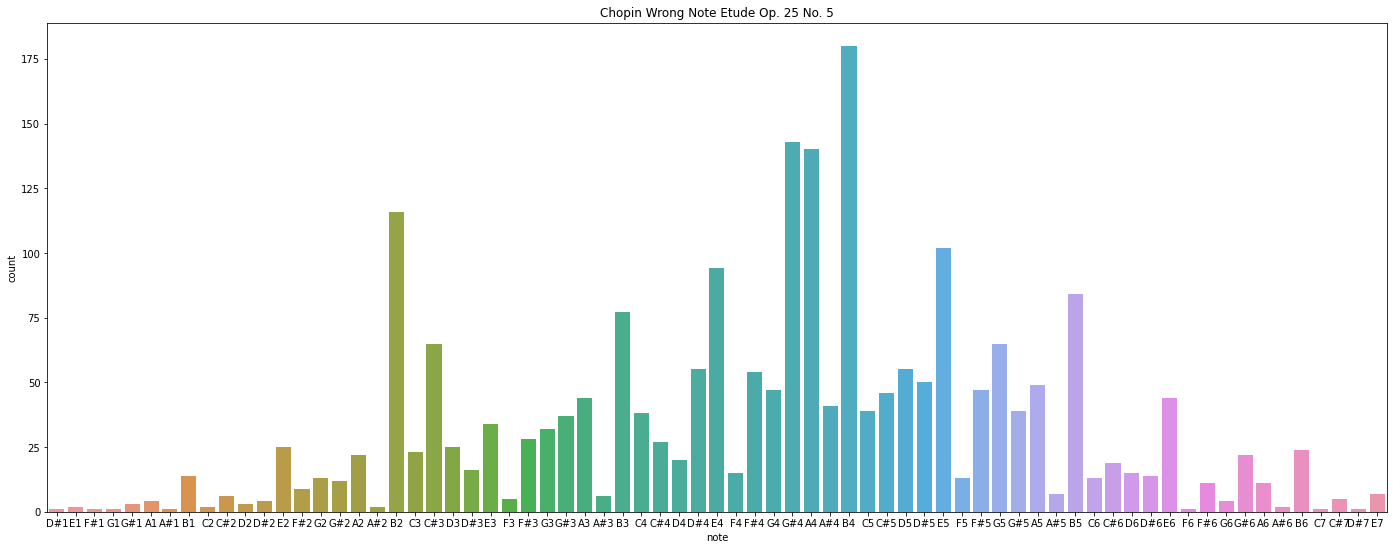

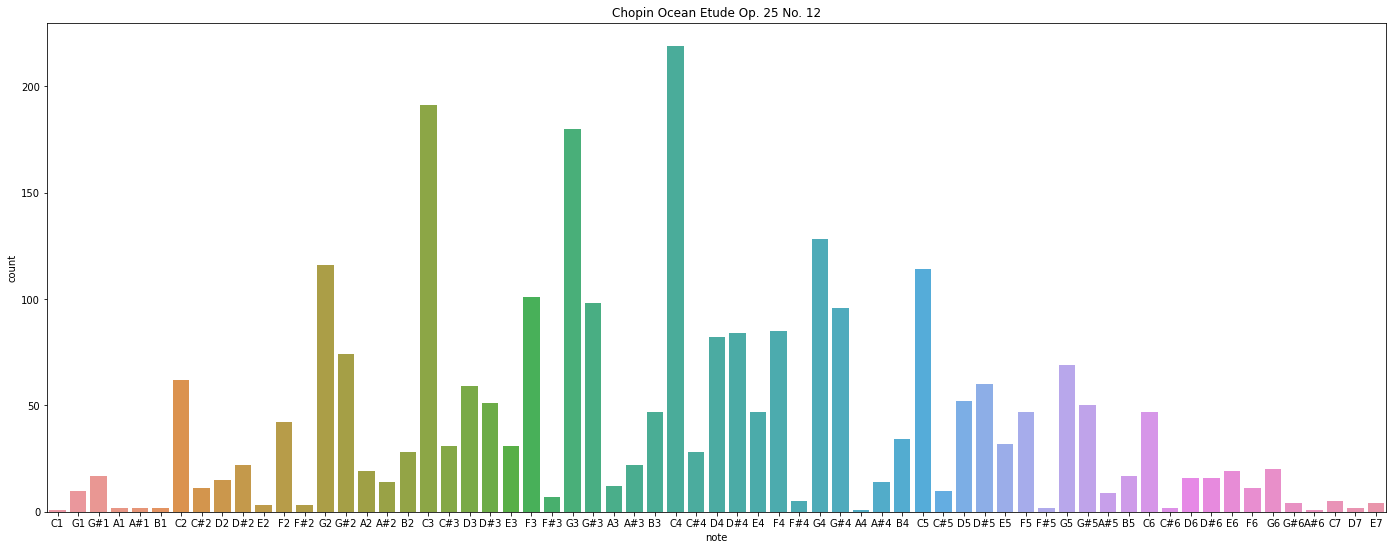

In [32]:
for index, (title, df) in enumerate(note_dict.items()):
    plot_note_frequency(df, title)

plt.show()

### Plotting LH RH Distribution

Next, I wanted to check if there are maybe any trends in how many notes occur in LH and RH respectively. Again, nothing really here that stands out - It just makes sense that Rachmaninoff's Moment Musicaux and Chopin's Revolutionary Etude have more LH than RH notes, and that the inverse is true for La Campanella, but this just makes sense if you know these pieces

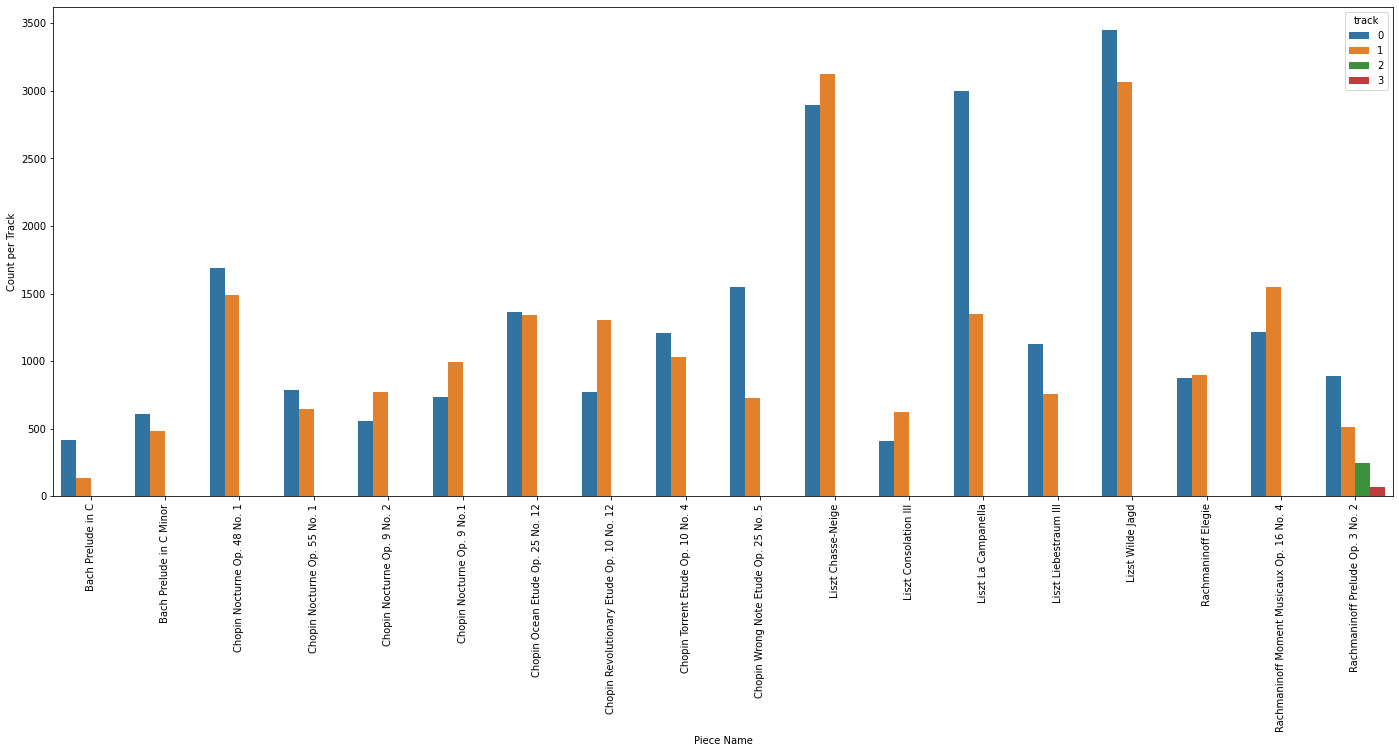

In [33]:
notes_per_track_df = note_df.groupby(['Piece Name', 'track'])['track'].count().reset_index(name='count')
plt.figure(figsize=(24,9))
g = sns.barplot(data=notes_per_track_df, x='Piece Name', y='count', hue='track')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel('Count per Track')
plt.show()

### Plotting overall notes

This is the first time we can see an actual trend or distinction between composers. Liszt Etudes tend to have much more notes than any other piece. Next, the outlier being Chopin's Nocturne Op. 48 No. 1 could be an indication that this nocturne is more difficult than other nocturnes - which is true (difficulty is of course not just determined by the amount of notes - but it can be a pretty good starting point). The amount of notes for the Nocturne is probably only as high because of the final section - the doppio movimento - that is being played at twice the speed. Moving on, they are then followed by "faster" pieces, such as Moment Musicaux, the Chopin Etudes, then the Nocturnes and lastly very slow pieces, such as Liszt's Consolation and Bach Prelude in C. The Bach Prelude in C Minor is actually a "fast" piece, but also very short.

Intuitevely, one could say there is a correlation between Amount of notes and BPM, or Amount of Notes and Piece Length. We will be taking a look at this later on.

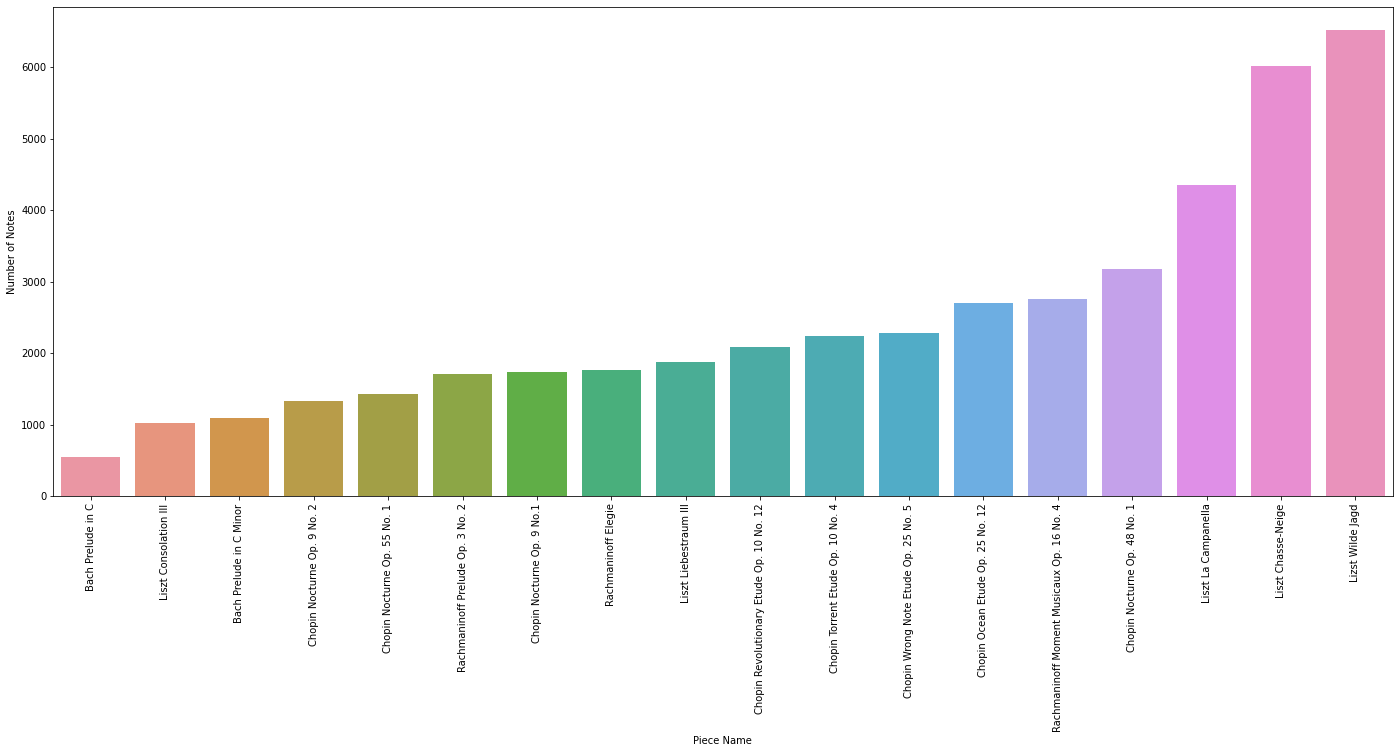

In [34]:
notes_total_df = note_df.groupby(['Piece Name'])['note'].count().reset_index(name='count').sort_values('count')
plt.figure(figsize=(24,9))
g = sns.barplot(data=notes_total_df, x='Piece Name', y='count')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel('Number of Notes')
plt.show()

### Plotting BPM
Next up, I want to see how usable the Midi Message `set_tempo` is, and wether I can use it to calculate the average BPM. The BPM Message denotes microseconds per beat (quarter_note).